<a href="https://colab.research.google.com/github/nikita1128/Zomato-Restaurant-Clustering-and-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Metadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

# **Importing the required libraries**

In [1]:
#Importing the required libraries

#For data loading and numerical operations
import pandas as pd
import numpy as np

#For data visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#For visualising and analysing words
from wordcloud import WordCloud
from nltk.corpus import stopwords

#For encoding
from sklearn.preprocessing import MultiLabelBinarizer

#For scaling
from sklearn.preprocessing import StandardScaler

#For clustering
from sklearn.cluster import KMeans

#For text preprocessing
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
import re
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

#For sentiment analysis
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

#For data splitting
from sklearn.model_selection import train_test_split

#For data modeling
from sklearn.linear_model import LogisticRegression

#For transformation
!pip install pipeline
from sklearn.pipeline import Pipeline

#For metrics evaluatioon
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

#remove warnings
import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Loading the data file**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#loading the data file using read_csv()

#Zomato Restaurant names and Metadata
zomato_res_metadata = pd.read_csv("/content/drive/MyDrive/Alma/Pro/Capstone Project/Copy of Zomato Restaurant names and Metadata.csv")

#Zomato Restaurant reviews
zomato_res_reviews = pd.read_csv("/content/drive/MyDrive/Alma/Pro/Capstone Project/Copy of Zomato Restaurant reviews.csv", parse_dates = ['Time'])


# **Variable Breakdown**

## **Zomato restaurant names and metadata**

This dataset will be used for clustering part as mentioned in the problem statement.

1. **Name:** Name of Restaurants

2. **Links:** URL Links of Restaurants

3. **Cost:** Per person estimated Cost of dining

4. **Collection:** Tagging of Restaurants w.r.t. Zomato categories

5. **Cuisines:** Cuisines served by Restaurants

6. **Timings:** Restaurant Timings

## **Zomato restaurant reviews**

This dataset will be merged with names and metadata and then use for sentiment analysis part as mentioned in the problem statement.

1. **Restaurant:** Name of the Restaurant

2. **Reviewer:** Name of the Reviewer

3. **Review:** Review Text

4. **Rating:** Rating Provided by Reviewer

5. **MetaData:** Reviewer Metadata - No. of Reviews and followers

6. **Time:** Date and Time of Review

7. **Pictures:** No. of pictures posted with review


# **Exploratory Data Analysis**

# **Zomato restaurant names and metadata**

In [4]:
#Displays the first five rows of the dataset
zomato_res_metadata.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
#Displays the last five rows of the dataset
zomato_res_metadata.tail()

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [6]:
#shape of the dataset
zomato_res_metadata.shape

(105, 6)

In [7]:
#Printing the rows and columns of a dataset
print ("Rows    : " ,zomato_res_metadata.shape[0])
print ("Columns : " ,zomato_res_metadata.shape[1])

Rows    :  105
Columns :  6


In [8]:
#Printing the list of columns(features) in dataframe
print("Features: \n" ,zomato_res_metadata.columns.tolist())

Features: 
 ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']


In [9]:
#getting information about the dataset using info() method
zomato_res_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [10]:
#Checking for the unique values in Timimgs column
print("Unique values :\n", zomato_res_metadata['Timings'].unique())

Unique values :
 ['12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)' '11 AM to 11 PM'
 '11:30 AM to 4:30 PM, 6:30 PM to 11 PM' '12 Noon to 2 AM'
 '12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12noon to 12midnight (Fri-Sat)'
 '12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30PM (Mon, Tue, Wed, Thu, Sun), 12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 12Midnight (Fri-Sat)'
 '7 AM to 10 PM' '12 Noon to 12 Midnight'
 '10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri-Sun)'
 '12 Noon to 3:30 PM, 7 PM to 10:30 PM'
 '12 Noon to 3:30 PM, 6:30 PM to 11:30 PM' '11:30 AM to 1 AM'
 '12noon to 12midnight (Mon-Sun)'
 '12 Noon to 4:30 PM, 6:30 PM to 11:30 PM' '12 Noon to 10:30 PM'
 '12 Noon to 11 PM' '12:30 PM to 10 PM (Tue-Sun), Mon Closed'
 '11:30 AM to 3 PM, 7 PM to 11 PM'
 '11am to 11:30pm (Mon, Tue, Wed, Thu, Sun), 11am to 12midnight (Fri-Sat)'
 '10 AM to 5 AM'
 '12 Noon to 12 Midnight (Mon-Thu, Sun), 12 Noon to 1 AM (Fri-Sat)'
 '12Noon to 11PM (Mon-Thu),12Noon to 11:30PM (Fri-Sun)'
 '12 Noon to 11:30 PM (Mon-Wed),

We will be dropping the 'Links' and 'Timings' columns as we are not using these two columns for further analysis.

In [11]:
#Making copy of original dataset to do further analysis
zomato_metadata = zomato_res_metadata.copy()

#Dropping Links and Timings columns
zomato_metadata.drop(['Links', 'Timings'], axis = 1, inplace = True)
zomato_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Cost         105 non-null    object
 2   Collections  51 non-null     object
 3   Cuisines     105 non-null    object
dtypes: object(4)
memory usage: 3.4+ KB


## **Handling missing values**

In [12]:
#checking null values
zomato_metadata.isnull().sum()

Name            0
Cost            0
Collections    54
Cuisines        0
dtype: int64

In [13]:
#Printing number of null(missing) values
print("Missing values :  ", zomato_metadata.isnull().sum().values.sum())

Missing values :   54


In [14]:
#calculating the missing percentage of features in the dataset
percent_missing = (zomato_metadata.isnull().sum()/len(zomato_metadata)) * 100 
percent_missing.round(2)

Name            0.00
Cost            0.00
Collections    51.43
Cuisines        0.00
dtype: float64

Inference:

1. From above we can see that 'Collections' column have 54 null/missing values with 51.43%. 

2. As the missing percentage of 'Collections' column is more than 50%, we will be dropping this column.

In [15]:
#checking duplicate values
zomato_metadata.duplicated().sum()

0

From above we can see that there are no duplicate values in names and metadata dataset.

In [16]:
#Dropping collections column as it have more than 50% of missing values
zomato_metadata.drop("Collections", axis = 1, inplace = True)
zomato_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      105 non-null    object
 1   Cost      105 non-null    object
 2   Cuisines  105 non-null    object
dtypes: object(3)
memory usage: 2.6+ KB


In [17]:
#Checking for the unique values in each column
print("Unique values :\n",zomato_metadata.nunique())

Unique values :
 Name        105
Cost         29
Cuisines     92
dtype: int64


In [18]:
#converting string variable into float variable
zomato_metadata['Cost'] = zomato_metadata['Cost'].str.replace(',','').apply(float)                #removing comma (,)

##**Descriptive Statistics**

In [19]:
#Using describe() function to generate descriptive statistics of the data
zomato_metadata.describe()

,Cost
count,105.000000
mean,861.428571
std,510.149730
min,150.000000
25%,500.000000
50%,700.000000
75%,1200.000000
max,2800.000000


Infernce:

1. The average per person estimated cost of dining for zomato restaurants is Rs. 861.428.
2. Minimum and maximum per person estimated cost of dining is Rs. 150 and Rs. 2800, respectively.

According my hypothesis:

1. Only 25 % of zomato restaurants are having expensive per person estimated cost of dining.



In [20]:
#Printing sorted list of unique cost
print("Sorted Cost: \n", sorted(zomato_metadata["Cost"].unique()))

Sorted Cost: 
 [150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 500.0, 550.0, 600.0, 650.0, 700.0, 750.0, 800.0, 850.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0, 1400.0, 1500.0, 1600.0, 1700.0, 1750.0, 1800.0, 1900.0, 2500.0, 2800.0]


#### We will create a new column of price_range from cost which will be as follows:

 *  cheap : 0 to 500
 *  moderate : 500 to 1000
 *  expensive : 1000 to 3000

In [21]:
#setting ranges for cost
bins = [0, 500, 1000, 3000]
labels = ['cheap', 'moderate', 'expensive']

#Bin values into discrete intervals
zomato_metadata['price_range'] = pd.cut(zomato_metadata['Cost'], bins = bins,labels = labels)

In [22]:
#to display cost with its range
zomato_metadata[['Cost','price_range']]

,Cost,price_range
0,800.0,moderate
1,800.0,moderate
2,1300.0,expensive
3,800.0,moderate
4,1200.0,expensive
...,...,...
100,600.0,moderate
101,200.0,cheap
102,500.0,cheap
103,250.0,cheap


##**Zomato restaurants distribution based on price range**

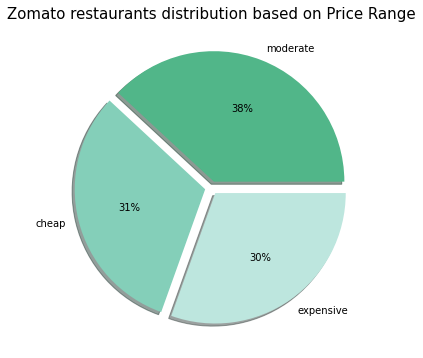

In [23]:
#setting figure size
fig = plt.figure(figsize=(6,6))

#defining Seaborn color palette
colors = sns.color_palette('BuGn_r')[2:10]

#Creating labels for the pie chart
labels = zomato_metadata['price_range'].value_counts().keys().tolist()

#create pie chart
plt.pie(zomato_metadata['price_range'].value_counts(), labels = labels, 
        colors = colors, autopct='%.0f%%', 
        explode = [0.05, 0.05, 0.05], shadow = True)

#To display title of the pie chart
plt.title("Zomato restaurants distribution based on Price Range", fontsize= 15)
plt.show()

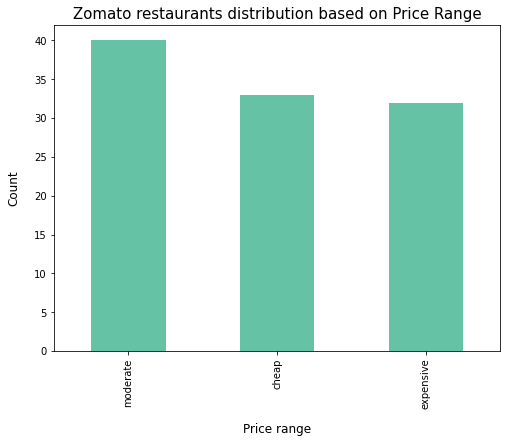

In [24]:
#Bar chart to display Zomato restaurants distribution based on Price Range
zomato_metadata['price_range'].value_counts().plot(kind='bar', colormap='Set2', figsize=(8, 6))

#To display the x label, y label and title of the bar chart
plt.xlabel("Price range", labelpad=14, fontsize = 12)
plt.ylabel("Count", labelpad=14, fontsize = 12)
plt.title("Zomato restaurants distribution based on Price Range", fontsize = 15)
plt.show()

In [25]:
#Let’s see the value count of price range
zomato_metadata['price_range'].value_counts()

moderate     40
cheap        33
expensive    32
Name: price_range, dtype: int64

Inference:
1. From above observations, we can conclude that our dataset is having a balanced price range i.e. cheap is 33 (~ 31%), moderate is 40 (~ 38%), and expensive is 32 (~ 30%).

2. Zomato restaurants with a moderate price range are more.

According to my hypothesis:
1. Zomato is having all sort of restaurants w.r.t. price range.

2. Customers prefers restaurants with affordable per person estimated cost of dining.


##**Top 20 cuisines in demand from zomato restaurants**

In [26]:
#Extracting all the cuisines 
cuisine = pd.Series([ele.strip() for cuis_str in zomato_metadata['Cuisines'] for ele in cuis_str.split(',')])

In [27]:
#Unique cuisines
print(f"Total Unique Cuisines are {cuisine.nunique()}.")
print("Unique Cuisines: \n", cuisine.unique())

Total Unique Cuisines are 44.
Unique Cuisines: 
 ['Chinese' 'Continental' 'Kebab' 'European' 'South Indian' 'North Indian'
 'Biryani' 'Asian' 'Mediterranean' 'Desserts' 'Seafood' 'Beverages' 'Goan'
 'Healthy Food' 'Lebanese' 'American' 'Ice Cream' 'Street Food'
 'Fast Food' 'BBQ' 'Italian' 'Finger Food' 'Burger' 'Japanese' 'Salad'
 'Sushi' 'Mexican' 'Mughlai' 'Andhra' 'Bakery' 'Juices' 'Arabian'
 'Hyderabadi' 'Cafe' 'Spanish' 'Wraps' 'Thai' 'Indonesian' 'Modern Indian'
 'Momos' 'Pizza' 'North Eastern' 'Mithai' 'Malaysian']


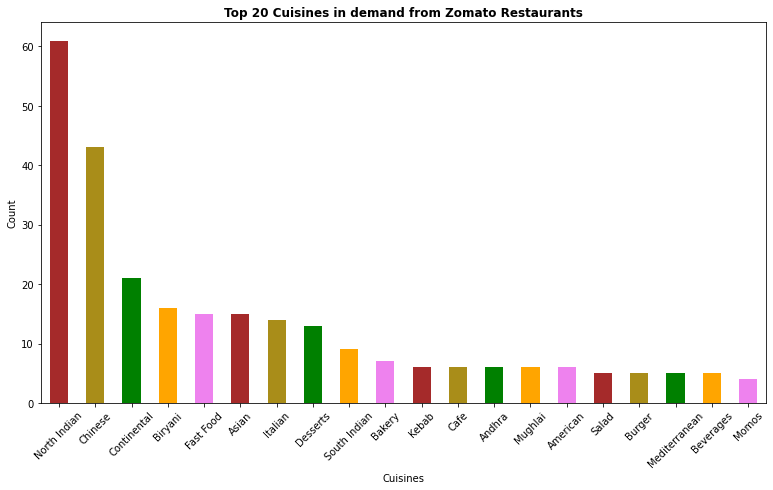

In [28]:
#visualizing top 20 cuisines

#setting figure size
plt.figure(figsize=(13, 7))

#Bar chart to display top 20 cuisines in demand
cuisine.value_counts()[:20].plot(kind = 'bar', 
                                color = ['brown', '#a98d19', 'green', 'orange', 'violet'])

#To display the x label, y label and title of the bar chart
plt.xlabel('Cuisines')
plt.ylabel('Count')
plt.title('Top 20 Cuisines in demand from Zomato Restaurants', weight='bold')

#setting xticks
plt.xticks(rotation = 45)

plt.show()

Inference:

1. North Indian is the most commonly offered cuisine, with 61 restaurants offering it.
2. Chinese is the second most commonly offered cuisine, with 43 restaurants offering it.

According to my hypothesis:

1. Zomato customers are prefering North Indian and Chinese food more.
2. Zomato having more North Indian restaurants than others could be the reason for its high demand.



## **Distribution based on number of cuisines offered by restaurants**

In [29]:
#creating column to display the number of cuisines offered by a particular restaurant
zomato_metadata['num_cuisines_offered'] = zomato_metadata.Cuisines.apply(lambda x: len((x.split(','))))
zomato_metadata[['Cuisines', 'num_cuisines_offered']]

,Cuisines,num_cuisines_offered
0,"Chinese, Continental, Kebab, European, South I...",6
1,"Biryani, North Indian, Chinese",3
2,"Asian, Mediterranean, North Indian, Desserts",4
3,"Biryani, North Indian, Chinese, Seafood, Bever...",5
4,"Asian, Continental, North Indian, Chinese, Med...",5
...,...,...
100,"Fast Food, Salad",2
101,"Bakery, Mithai",2
102,"North Indian, Biryani, Chinese",3
103,Fast Food,1


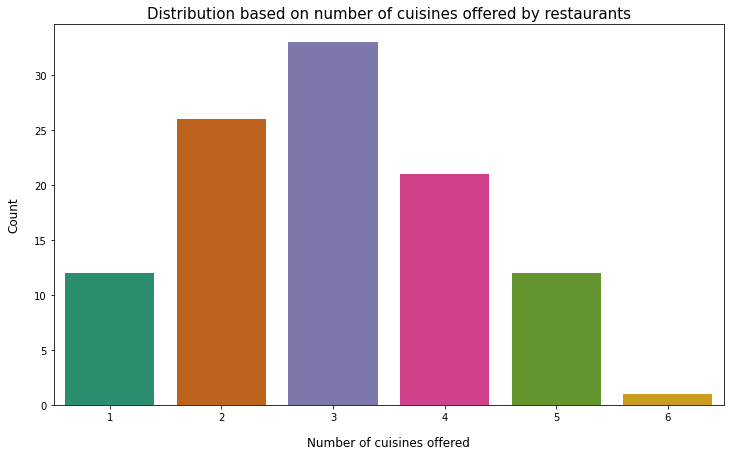

In [30]:
#setting figure size
plt.figure(figsize=(12, 7))

#count plot to display distribution based on number of cuisines offered by restaurants
sns.countplot(data = zomato_metadata, x = 'num_cuisines_offered', palette = 'Dark2')

#To display the x label, y label and title of the bar chart
plt.xlabel("Number of cuisines offered", labelpad=14, fontsize = 12)
plt.ylabel("Count", labelpad=14, fontsize = 12)
plt.title("Distribution based on number of cuisines offered by restaurants", fontsize = 15)
plt.xticks(rotation=360)
plt.show()

In [31]:
#Let’s see the value count of cuisines offered
zomato_metadata['num_cuisines_offered'].value_counts()

3    33
2    26
4    21
5    12
1    12
6     1
Name: num_cuisines_offered, dtype: int64

Inference:
1. Maximum restaurants are offering 3 cuisines.
2. The maximum number of cuisines offered by a zomato restaurant is 6 and it is only available in a single restaurant.

According to my hypothesis:
1. Zomato restaurants should have at least 3 cuisines in their menu to gain more customers.

## **Distribution according to the price range of number of cuisines**

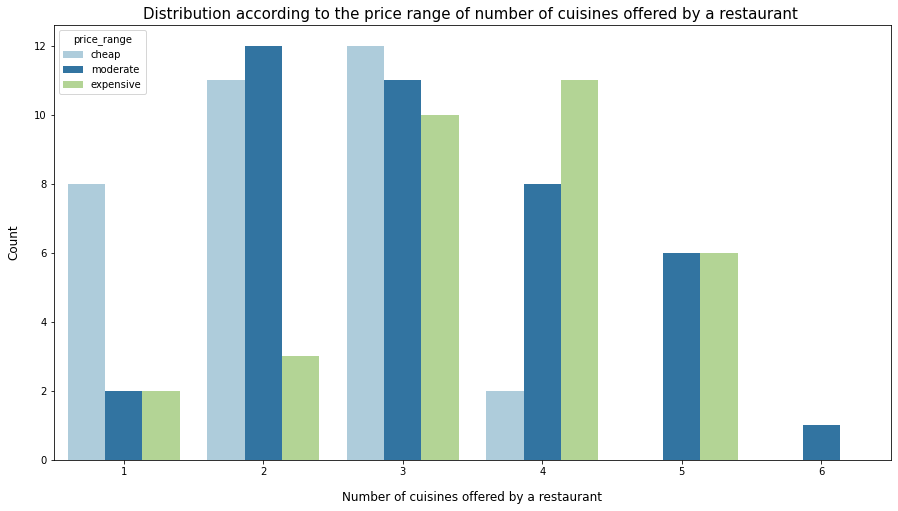

In [32]:
#setting figure size
plt.figure(figsize=(15, 8))

#count plot to display distribution based on number of cuisines offered by a restaurant w.r.t to their price range
sns.countplot(data = zomato_metadata, x = 'num_cuisines_offered', 
              hue= 'price_range', palette = 'Paired')

#To display the x label, y label and title of the count plot
plt.xlabel("Number of cuisines offered by a restaurant", labelpad=14, fontsize = 12)
plt.ylabel("Count", labelpad=14, fontsize = 12)
plt.title("Distribution according to the price range of number of cuisines offered by a restaurant ", fontsize = 15)
plt.show()

Inference:
1. Zomato restaurants offering 3 and 4 cuisines are more expensive, whereas the one offering six cuisines is having moderate price range.
2. Zomato restaurants that are offering 2 and 3 cuisines have both low as well as moderate price ranges.

According to my hypothesis:
1. Zomato restaurants serving three cuisines seems to be affordable for everyone.
2. More number of cuisines does not promise more customers as we can see that restaurants with more number of cuisines are having a low count of customers indicating that there are other factors also attracting the customers.

## **Cuisines distribution according to cost**

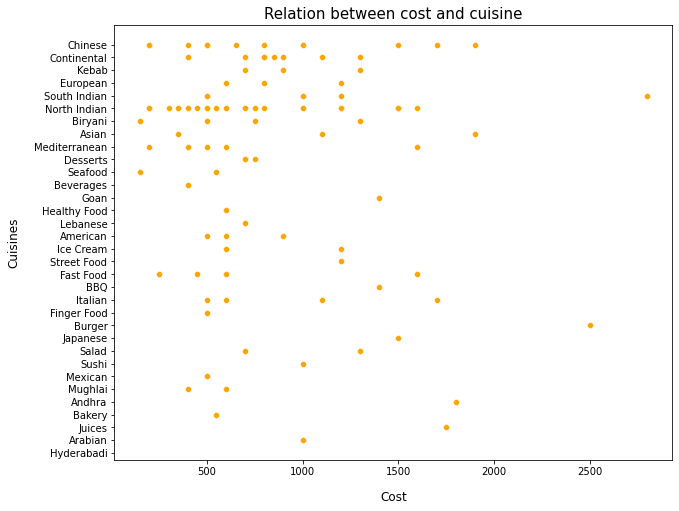

In [33]:
#checking relation of cost and cuisine

#setting figure size
fig = plt.figure(figsize=(10,8))

#Creating boxplot
sns.scatterplot(y= cuisine, x = zomato_metadata['Cost'], color='orange')
plt.xlabel("Cost", labelpad=14, fontsize = 12)
plt.ylabel("Cuisines", labelpad=14, fontsize = 12)
plt.title("Relation between cost and cuisine", fontsize = 15)
plt.show()

Inference:

1. North Indian and Chinese food has wide price range.

According to my hypothesis:
1. Wider price range of North Indian and Chinese could be the reason for their high demand.

In [34]:
#Removing price_range column from the dataframe as it will not be used in further analysis
zomato_metadata.drop('price_range', axis=1, inplace = True)
zomato_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  105 non-null    object 
 1   Cost                  105 non-null    float64
 2   Cuisines              105 non-null    object 
 3   num_cuisines_offered  105 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ KB


# **Zomato restaurant reviews**

In [35]:
#Displays the first five rows of the dataset
zomato_res_reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",2019-05-25 15:54:00,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",2019-05-24 22:11:00,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0


In [36]:
#Displays the last five rows of the dataset
zomato_res_reviews.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",2016-06-05 00:08:00,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",2016-06-04 22:01:00,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",2016-06-03 10:37:00,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",2016-05-31 17:22:00,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",2016-05-31 16:41:00,6


In [37]:
#shape of the dataset
zomato_res_reviews.shape

(10000, 7)

In [38]:
#Printing the rows and columns of a dataset
print ("Rows    : " ,zomato_res_reviews.shape[0])
print ("Columns : " ,zomato_res_reviews.shape[1])

Rows    :  10000
Columns :  7


In [39]:
#Printing the list of columns(features) in dataset
print("Features: \n" ,zomato_res_reviews.columns.tolist())

Features: 
 ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [40]:
#getting information about the dataset using info() method
zomato_res_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Restaurant  10000 non-null  object        
 1   Reviewer    9962 non-null   object        
 2   Review      9955 non-null   object        
 3   Rating      9962 non-null   object        
 4   Metadata    9962 non-null   object        
 5   Time        9962 non-null   datetime64[ns]
 6   Pictures    10000 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 547.0+ KB


## **Handling missing values**

In [41]:
#checking null values
zomato_res_reviews.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [42]:
#Printing number of null(missing) values
print("Missing values :  ", zomato_res_reviews.isnull().sum().values.sum())

Missing values :   197


In [43]:
#calculating the missing percentage of features in the dataset
percent_missing = (zomato_res_reviews.isnull().sum()/len(zomato_res_reviews)) * 100 
percent_missing.round(2)

Restaurant    0.00
Reviewer      0.38
Review        0.45
Rating        0.38
Metadata      0.38
Time          0.38
Pictures      0.00
dtype: float64

Inference:

1. From above we can see that there are 197 null/missing value in our dataframe. Number of null/missing values with their respective percentages are as follows:
 * Reviewer : 38 with 0.38%
 * Review : 45 with 0.45%
 * Rating : 38 with 0.38%
 * Metadata : 38 with 0.38%
 * Time : 38 with 0.38%

2. As the missing percentages are low, we will be dropping null values from these columns.

In [44]:
#Making copy of original dataset to do further analysis
zomato_reviews = zomato_res_reviews.copy()

#Dropping all other rows having null/missing values
zomato_reviews.dropna(inplace = True)
zomato_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Restaurant  9955 non-null   object        
 1   Reviewer    9955 non-null   object        
 2   Review      9955 non-null   object        
 3   Rating      9955 non-null   object        
 4   Metadata    9955 non-null   object        
 5   Time        9955 non-null   datetime64[ns]
 6   Pictures    9955 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 622.2+ KB


In [45]:
#checking duplicate values
zomato_reviews.duplicated().sum()

0

#### From above we can see that there are no duplicate values in reviews dataset.

In [46]:
#Checking for the unique values in each column
print("Unique values :\n",zomato_reviews.nunique())

Unique values :
 Restaurant     100
Reviewer      7442
Review        9364
Rating          10
Metadata      2477
Time          9775
Pictures        36
dtype: int64


In [47]:
#Unique rating in dataset
print("Unique ratings: \n",zomato_reviews["Rating"].unique())

Unique ratings: 
 ['5' '4' '1' '3' '2' '3.5' '4.5' '2.5' '1.5' 'Like']


In [48]:
#checking observations with Rating = Like
zomato_reviews[zomato_reviews['Rating'].isin(['Like'])]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
7601,The Old Madras Baking Company,Dhanasekar Kannan,One of the best pizzas to try. It served with ...,Like,"12 Reviews , 21 Followers",2019-05-18 12:31:00,1


As there is only 1 observation with Rating = 'Like', we will be replacing it with rating of 5.

In [49]:
#Changing 'like' as rating of 5 and converting string variable into float variable
zomato_reviews['Rating'] = zomato_reviews['Rating'].replace('Like', '5').apply(float)
zomato_reviews['Rating'].unique()

array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5])

##**Descriptive Statistics**

In [50]:
#Using describe() function to generate descriptive statistics of the data
zomato_reviews.describe()

,Rating,Pictures
count,9955.000000,9955.000000
mean,3.600402,0.751984
std,1.483565,2.575691
min,1.000000,0.000000
25%,3.000000,0.000000
50%,4.000000,0.000000
75%,5.000000,0.000000
max,5.000000,64.000000


Inference:

1. Rating of restaurants ranges from 1 to 5.
2. Average rating of zomato restaurants is 3.6.
3. Maximum number of pictures posted with reviews is 64.
4. Only few people are uploading pics.

According to my hypothesis:
1. Customers prefer giving ratings without uploading pics.

2. Maximum customers have given the highest rating for zomato restaurants.

##**Zomato restaurants distribution based on ratings**

In [51]:
zomato_reviews['Rating'].value_counts()

5.0    3827
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

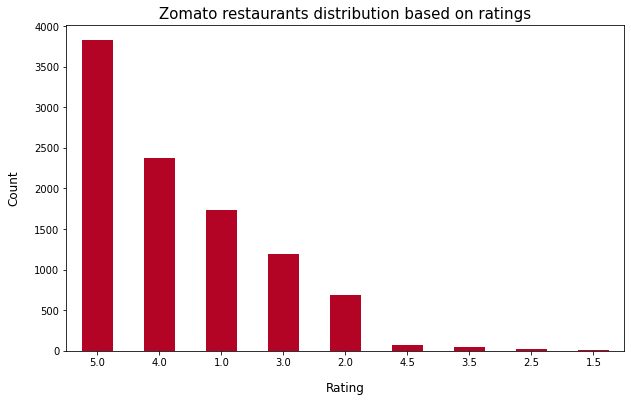

In [52]:
#Bar plot to display zomato restaurants distribution based on Ratings
zomato_reviews['Rating'].value_counts().plot(kind='bar', colormap='coolwarm_r', figsize=(10, 6))

#To display the x label, y label and title of the bar chart
plt.xlabel("Rating", labelpad=14, fontsize = 12)
plt.ylabel("Count", labelpad=14, fontsize = 12)
plt.title("Zomato restaurants distribution based on ratings", fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

Inference:

1. Most of the customers have rated restaurants as 5.
2. Few customers have given specific rating (i.e., not a whole number).
3. The minimum rating of zomato restaurants is 2, if we are not considering specific ratings.

According to my hypothesis:

1. Most of the customers are satisfied with the food and services offered by zomato restaurants.



#### We will create a new rate_range column from rating which will be as follows:
* very low : 0-1
* low : 1-2
* moderate : 2-3
* high : 3-4
* exceptional: 4-5


In [53]:
#create a new rate_range column from rating 

#setting ranges for rating
bins =[0,1,2,3,4,5]
labels =['very low','low','moderate','high','exceptional']

#Bin values into discrete intervals
zomato_reviews['Rate_range'] = pd.cut(zomato_reviews['Rating'], bins = bins,labels = labels)

In [54]:
#To display rate with its range
zomato_reviews[['Rating','Rate_range']]

,Rating,Rate_range
0,5.0,exceptional
1,5.0,exceptional
2,5.0,exceptional
3,5.0,exceptional
4,5.0,exceptional
...,...,...
9995,3.0,moderate
9996,4.5,exceptional
9997,1.5,low
9998,4.0,high


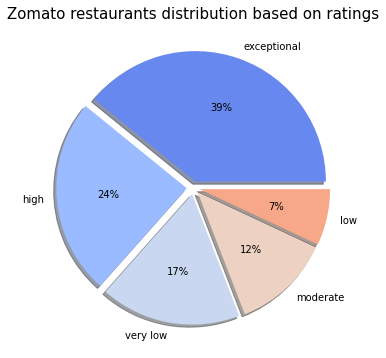

In [55]:
#pie chart to display zomato restaurants distribution based on ratings

#setting figure size
fig = plt.figure(figsize=(6,6))

#defining Seaborn color palette
colors = sns.color_palette('coolwarm')

#Creating labels for the pie chart
labels = zomato_reviews['Rate_range'].value_counts().keys().tolist()

#create pie chart
plt.pie(zomato_reviews['Rate_range'].value_counts(), labels = labels, 
        colors = colors, autopct='%.0f%%', 
        explode = [0.05, 0.05, 0.05, 0.05, 0.05], shadow = True)

#To display title of the pie chart
plt.title("Zomato restaurants distribution based on ratings", fontsize= 15)
plt.show()

In [56]:
#Count of different ratings
zomato_reviews['Rate_range'].value_counts()

exceptional    3896
high           2420
very low       1735
moderate       1211
low             693
Name: Rate_range, dtype: int64

Inference:

1.  From above observations, we can conclude that our dataset is having a unbalanced rating range i.e. restaurants with exceptional is 3896 (~ 39%), high is 2420 (~ 24%), moderate is 1211 (~ 12%), low is 639 (~ 7%) and very low is 1735 (~ 17%).
2. Most of the zomato restaurants are having exceptional rating (i.e., ranging from 4 to 5) and few are having low rating (i.e., ranging from 1 to 2).

According to my hypothesis:

1. Most of the zomato restaurants were rated exceptional by customer because of their good food and services .
2. Most of the customers are satisfied with the quality of food.

In [57]:
#Removing Rate_range column from the dataframe as it will not be used in further analysis
zomato_reviews.drop('Rate_range', axis=1, inplace = True)
zomato_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Restaurant  9955 non-null   object        
 1   Reviewer    9955 non-null   object        
 2   Review      9955 non-null   object        
 3   Rating      9955 non-null   float64       
 4   Metadata    9955 non-null   object        
 5   Time        9955 non-null   datetime64[ns]
 6   Pictures    9955 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 622.2+ KB


## **Top 10 zomato restaurants based on average ratings**

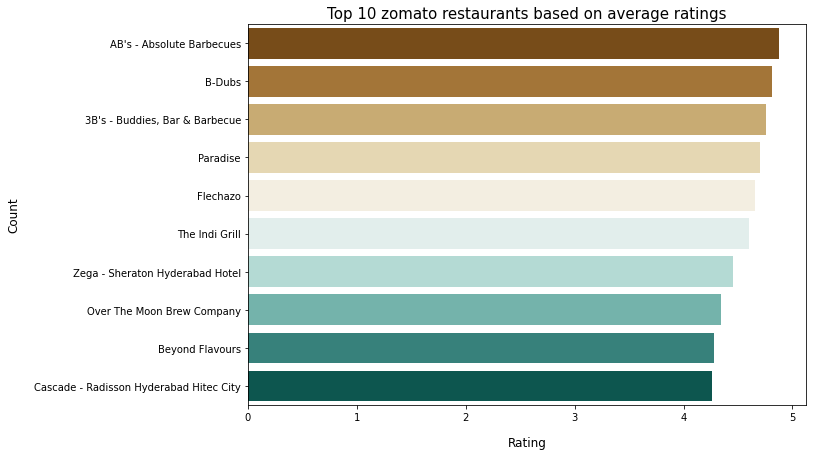

In [58]:
#setting figure size
plt.figure(figsize = (10,7))

#creating data to use for visualization
data = zomato_reviews.groupby('Restaurant')['Rating'].mean().reset_index().sort_values(by='Rating', ascending=False)

#Bar plot to display top 10 zomato restaurants based on average ratings
sns.barplot(y = data.head(10)['Restaurant'], x = data.head(10)['Rating'], palette="BrBG")

#To display the x label, y label and title of the bar chart
plt.xlabel("Rating", labelpad=14, fontsize = 12)
plt.ylabel("Count", labelpad=14, fontsize = 12)
plt.title("Top 10 zomato restaurants based on average ratings", fontsize = 15)
plt.show()

Infernce:
1. None of the top 10 zomato restaurants has got full rating on average.
2. AB's-Absolute Barbecues is the topper of zomato restaurants, with a close competition with B-Dubs.

According to my hypothesis:
1. All the customers are not completely satisfied with any of the restaurants.

# **Merging zomato restaurant names and metadata with restaurant reviews**

In [59]:
#Merging the metadata and name dataframe with restaurant reviews dataframe
zomato_metadata.rename(columns = {'Name':'Restaurant'}, inplace = True)
zomato_df = pd.merge(zomato_metadata, zomato_reviews, on = 'Restaurant')

In [60]:
#Displays the first five rows of the dataset
zomato_df.head()

,Restaurant,Cost,Cuisines,num_cuisines_offered,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,800.0,"Chinese, Continental, Kebab, European, South I...",6,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0
1,Beyond Flavours,800.0,"Chinese, Continental, Kebab, European, South I...",6,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0
2,Beyond Flavours,800.0,"Chinese, Continental, Kebab, European, South I...",6,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0
3,Beyond Flavours,800.0,"Chinese, Continental, Kebab, European, South I...",6,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0
4,Beyond Flavours,800.0,"Chinese, Continental, Kebab, European, South I...",6,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0


In [61]:
#Displays the last five rows of the dataset
zomato_df.tail()

,Restaurant,Cost,Cuisines,num_cuisines_offered,Reviewer,Review,Rating,Metadata,Time,Pictures
9950,Chinese Pavilion,1000.0,"Chinese, Seafood",2,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,"53 Reviews , 54 Followers",2016-06-05 00:08:00,0
9951,Chinese Pavilion,1000.0,"Chinese, Seafood",2,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",2016-06-04 22:01:00,0
9952,Chinese Pavilion,1000.0,"Chinese, Seafood",2,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",2016-06-03 10:37:00,3
9953,Chinese Pavilion,1000.0,"Chinese, Seafood",2,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,"13 Reviews , 144 Followers",2016-05-31 17:22:00,0
9954,Chinese Pavilion,1000.0,"Chinese, Seafood",2,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",2016-05-31 16:41:00,6


In [62]:
#shape of the dataset
zomato_df.shape

(9955, 10)

In [63]:
#Printing the rows and columns of a dataset
print ("Rows    : " ,zomato_df.shape[0])
print ("Columns : " ,zomato_df.shape[1])

Rows    :  9955
Columns :  10


In [64]:
#Printing the list of columns(features) in dataframe
print("Features: \n" ,zomato_df.columns.tolist())

Features: 
 ['Restaurant', 'Cost', 'Cuisines', 'num_cuisines_offered', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [65]:
#getting information about the dataset using info() method
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9954
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Restaurant            9955 non-null   object        
 1   Cost                  9955 non-null   float64       
 2   Cuisines              9955 non-null   object        
 3   num_cuisines_offered  9955 non-null   int64         
 4   Reviewer              9955 non-null   object        
 5   Review                9955 non-null   object        
 6   Rating                9955 non-null   float64       
 7   Metadata              9955 non-null   object        
 8   Time                  9955 non-null   datetime64[ns]
 9   Pictures              9955 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 855.5+ KB


From above we can see that there is no null (missing) value in our dataframe.

## **Top 10 affordable zomato restaurants**

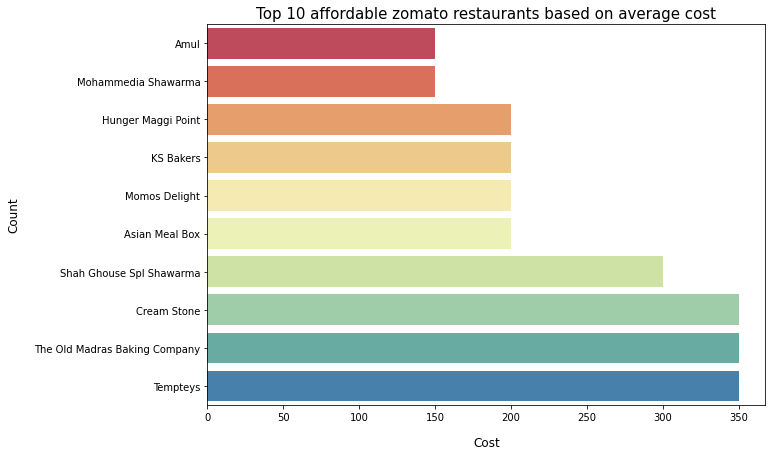

In [66]:
#setting figure size
plt.figure(figsize = (10,7))

#creating data to use for visualization
data = zomato_df.groupby('Restaurant')['Cost'].mean().reset_index().sort_values(by='Cost')

#Bar plot to display top 10 cheap zomato restaurants based on average ratings
sns.barplot(y = data.head(10)['Restaurant'], x = data.head(10)['Cost'], palette = 'Spectral')

#To display the x label, y label and title of the bar chart
plt.xlabel("Cost", labelpad=14, fontsize = 12)
plt.ylabel("Count", labelpad=14, fontsize = 12)
plt.title("Top 10 affordable zomato restaurants based on average cost", fontsize = 15)
plt.show()

Inference:
1. Amul and Mohammedia Shawarma are the cheapest zomato restaurants with average cost of Rs. 150.
2. No restaurant is crossing the cost of Rs. 350 among the top 10 affordable zomato restaurants.

According to my hypothesis:

1. Top 2 affordable restaurants could be charging low due to its cuisines.

## **Top 10 expensive zomato restaurants**

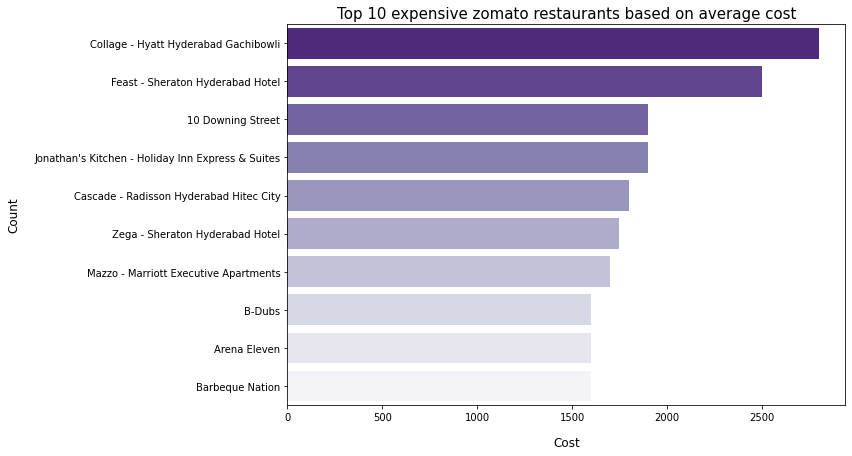

In [67]:
#setting figure size
plt.figure(figsize = (10,7))

#creating data to use for visualization
data = zomato_df.groupby('Restaurant')['Cost'].mean().reset_index().sort_values(by='Cost', ascending=False)

#Bar plot to display top 10 expensive zomato restaurants based on average ratings
sns.barplot(y = data.head(10)['Restaurant'], x = data.head(10)['Cost'], palette = 'Purples_r')

#To display the x label, y label and title of the bar chart
plt.xlabel("Cost", labelpad=14, fontsize = 12)
plt.ylabel("Count", labelpad=14, fontsize = 12)
plt.title("Top 10 expensive zomato restaurants based on average cost", fontsize = 15)
plt.show()

Inference:
1. Collage-Hyatt Hyderabad Gachibowli is the only restaurant to cross the average cost of Rs. 2500.
2. The average cost of all the restaurants is below Rs. 2000 except the top 2 expensive restaurants.

According to my hypothesis:

1. Top 2 expensive restaurants could be charging more beacause of its services and cuisines.

## **Number of cuisines distribution w.r.t. cost**

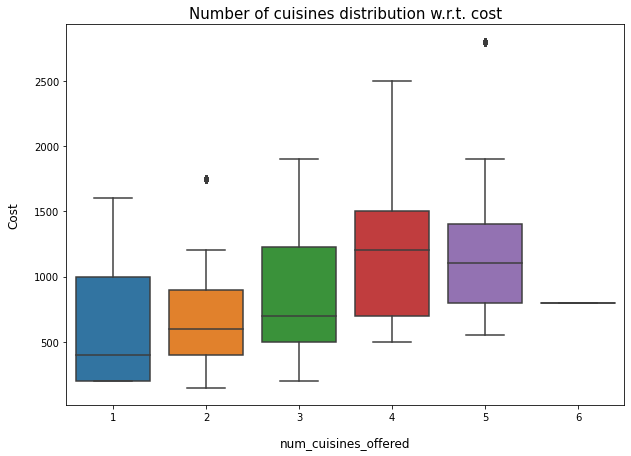

In [68]:
#setting figure size
fig = plt.figure(figsize=(10,7))

#Creating boxplot
sns.boxplot(y= zomato_df['Cost'], x = zomato_df['num_cuisines_offered'])

#To display the x label, y label and title of the boxplot
plt.xlabel("num_cuisines_offered", labelpad=14, fontsize = 12)
plt.ylabel("Cost", labelpad=14, fontsize = 12)
plt.title("Number of cuisines distribution w.r.t. cost", fontsize = 15)
plt.show()

In [69]:
#Let’s see the value count of cuisines offered
zomato_df['num_cuisines_offered'].value_counts()

3    3200
2    2395
4    1976
5    1199
1    1085
6     100
Name: num_cuisines_offered, dtype: int64

Inference:

1. Restaurants with at least four cuisines have a starting price of Rs. 500 and above.
2. Restaurants with three cuisines cover all the price ranges (i.e., cheap, moderate, and expensive).

According to my hypothesis:
1. Restaurants with three cuisines may attract more customers because of their price range.

## **Top 10 reviewers on an average**

In [70]:
#creating column to display the number of reviews given by a particular reviewer
zomato_df['Num_of_reviews'] = zomato_df.Metadata.apply(lambda x: (x.split()[0])).astype('float')
zomato_df[['Reviewer', 'Num_of_reviews']]

,Reviewer,Num_of_reviews
0,Rusha Chakraborty,1.0
1,Anusha Tirumalaneedi,3.0
2,Ashok Shekhawat,2.0
3,Swapnil Sarkar,1.0
4,Dileep,3.0
...,...,...
9950,Abhishek Mahajan,53.0
9951,Sharad Agrawal,2.0
9952,Ramandeep,65.0
9953,Nayana Shanbhag,13.0


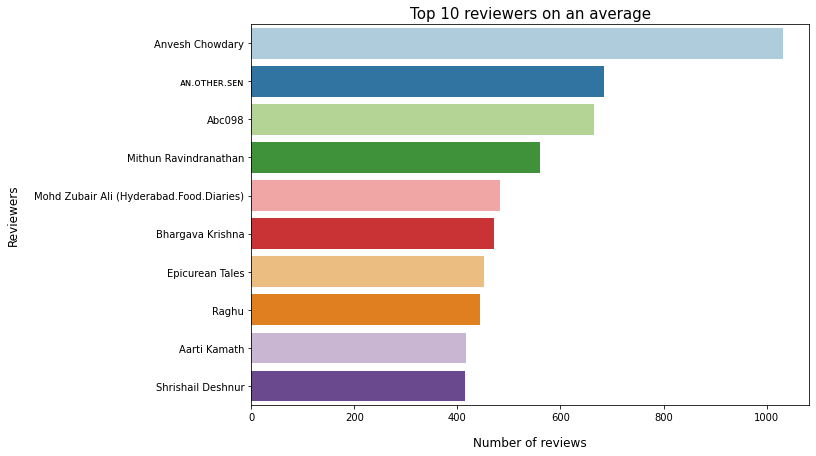

In [71]:
#setting figure size
plt.figure(figsize = (10,7))

#creating data to use for visualization
data = zomato_df.groupby('Reviewer')['Num_of_reviews'].mean().reset_index().sort_values(by='Num_of_reviews', ascending=False)

#Bar plot to display top 10 reviewers
sns.barplot(y = data.head(10)['Reviewer'], 
            x = data.head(10)['Num_of_reviews'], palette = 'Paired')

#To display the x label, y label and title of the bar chart
plt.xlabel("Number of reviews", labelpad=14, fontsize = 12)
plt.ylabel("Reviewers", labelpad=14, fontsize = 12)
plt.title("Top 10 reviewers on an average", fontsize = 15)
plt.show()

Inference:

1. On average, Anvesh Chowdary is the top reviewer.
2. On average, the total number of reviews reaches 700, except for the top reviewer with more than 1,000 reviews. 

According to my hypothesis:

1. Zomato can focus on top reviewers to know the reason behind so many reviews, whether it is due to satisfaction or dissatisfaction.
2. If the review is due to dissatisfaction, zomato should try to resolve the issue.
3. If the review is due to satisfaction, zomato can find the reason and continue with the same process.
4. Zomato can give more offers to top reviewers to keep them interacting.

## **Distribution according to date and time of review**

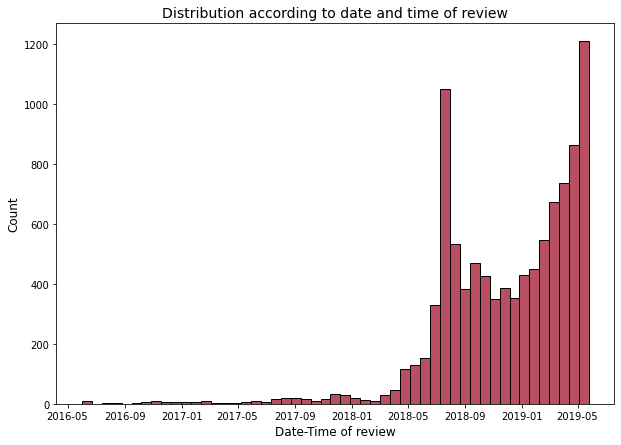

In [72]:
#setting figure size
plt.figure(figsize=(10,7))

#histogram plot for time distribution
sns.histplot(zomato_df['Time'], color = '#A2142F')    

#To display x label, y label and the title of the bar chart
plt.xlabel('Date-Time of review', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Distribution according to date and time of review', fontsize = 14) 
plt.show()

Inference:

1. More reviews are there in the year 2018 and 2019.
2. After 2017, there was a sudden rise in cutomer reviews.

According to my hypothesis:

1. Reviewers are more active in later years.
2. Customers prefer online ordering in later years.
3. Zomato has got a sudden increase in popularity after the year 2017.

## **Expanding and analysing 'Time' column**

In [73]:
#Creating a function to extract the features of time

def time_features_extractor(dataframe, attribute_list = ['month','dayofweek','hour']):
    ''' Takes dataframe with a column labeled 'Time' and time attribute's list 
        as arguments to return dataframe with addition of new columns from time 
        attributes list.
    '''

    for attribute in attribute_list:
        dataframe[attribute] = dataframe['Time'].apply(lambda x: getattr(x, attribute))
    return dataframe


#### In order to study our features further, we'll increase our resolution by expanding the 'Time' column into 3 columns:

*  Month

*  Day of week

* Hour


In [74]:
#Creating dayofweek, month and hour column using function time_featues_extractor
zomato_df = time_features_extractor(zomato_df)
zomato_df.head()

,Restaurant,Cost,Cuisines,num_cuisines_offered,Reviewer,Review,Rating,Metadata,Time,Pictures,Num_of_reviews,month,dayofweek,hour
0,Beyond Flavours,800.0,"Chinese, Continental, Kebab, European, South I...",6,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,1.0,5,5,15
1,Beyond Flavours,800.0,"Chinese, Continental, Kebab, European, South I...",6,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,3.0,5,5,14
2,Beyond Flavours,800.0,"Chinese, Continental, Kebab, European, South I...",6,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,2.0,5,4,22
3,Beyond Flavours,800.0,"Chinese, Continental, Kebab, European, South I...",6,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0,1.0,5,4,22
4,Beyond Flavours,800.0,"Chinese, Continental, Kebab, European, South I...",6,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,3.0,5,4,21


##**Reviews posted count per day of week**

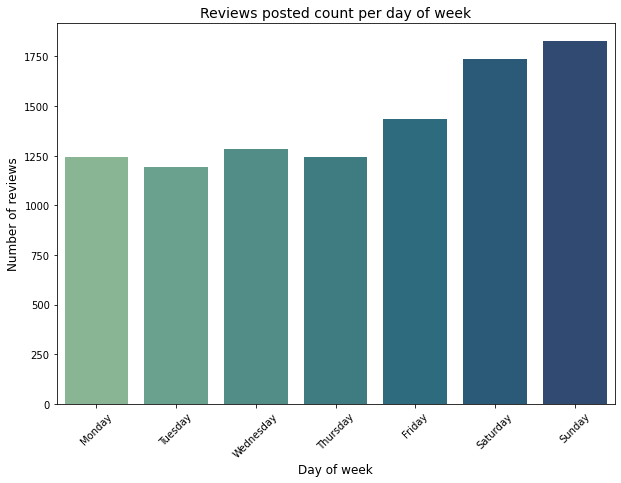

In [75]:
#setting figure size
plt.figure(figsize=(10,7))

#Creating ticks range and labels for the bar chart
ticks = list(range(0, 7)) 
labels = "Monday Tuesday Wednesday Thursday Friday Saturday Sunday".split()

#Count plot for reviews posted count per Day of Week
sns.countplot(zomato_df.dayofweek, palette = 'crest')

#To display x label, y label and the title of the bar chart
plt.xlabel('Day of week', fontsize = 12)
plt.ylabel('Number of reviews', fontsize = 12)
plt.title('Reviews posted count per day of week', fontsize = 14) 
plt.xticks(ticks, labels, rotation = '45')
plt.show()

Inference:

1. Maximum reviews are posted on weekends (i.e., Saturday and Sunday).

According to my hypothesis:

1. As people are generally free on weekends, therefore more orders are placed on weekends.

2. Zomato should keep their customer care team more efficient on weekends. 

##**Reviews posted count per hour**

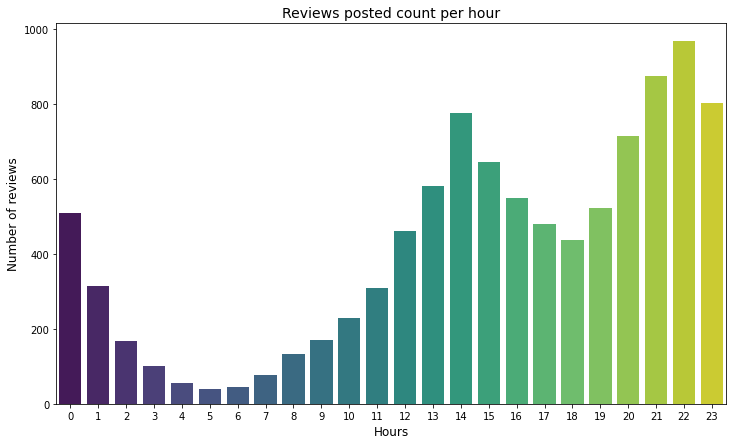

In [76]:
#setting figure size
plt.figure(figsize=(12,7))

#Count plot for reviews posted count per Day of Week
sns.countplot(zomato_df.hour, palette = 'viridis')

#To display x label, y label and the title of the bar chart
plt.xlabel('Hours', fontsize = 12)
plt.ylabel('Number of reviews', fontsize = 12)
plt.title('Reviews posted count per hour', fontsize = 14) 
plt.show()

Inference:

1. The majority of reviews are posted at night (i.e, between 20 and 23 hrs).

2. In the noon, most of the reviews are posted at 2 pm (i.e., at 14 hrs).

3. The highest and lowest number of reviews are at 10 pm (i.e., 22 hrs) and 5 am (i.e., 5 hrs), respectively.

According to my hypothesis:
1. Zomato is getting orders each hour.

2. Zomato is getting more reviews and orders at night, and in the noon, at 2 pm, as people are generally free during these hours.


In [77]:
#Functions to be used for the plots

#creating monthly() funtion for 'month' column
def monthly(x, df = zomato_df):
    ''' Takes the dataframe (zomato_df) with a column labeled 'month'and 
        a column (x) as arguments to return the mean of x.
    '''

    return df.groupby('month')[x].mean()


#creating monthly_daily() funtion to return a pivot table for 'dayofweek' & 'month' column
def monthly_daily(x, df = zomato_df):
    ''' Takes the dataframe (zomato_df) with two columns labeled as 'dayofweek'
        and 'month' and a column (x) to return a pivot table.
    '''

    by_day = df.pivot_table(index = 'dayofweek', columns = ['month'], 
                                       values = x, aggfunc = 'mean')
    return round(by_day, ndigits = 2)
    

##**Average number of reviews per month**

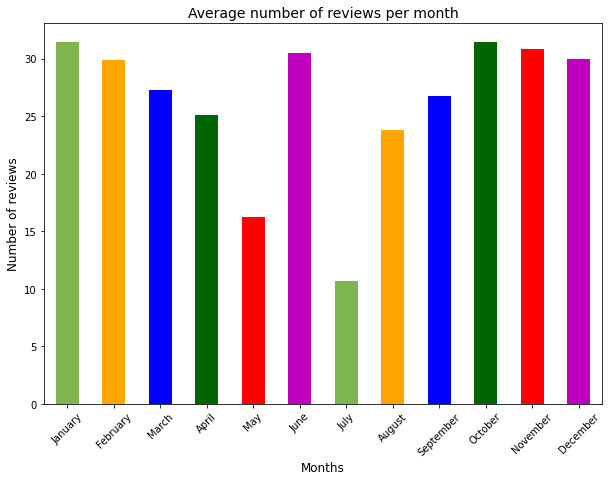

In [78]:
#Bar chart for average number of reviews per month
monthly('Num_of_reviews').plot(kind = 'bar', figsize = (10,7), color=list(['#7eb54e','orange','blue','darkgreen','red','m']))

#Creating ticks range and labels for the bar chart
ticks = list(range(0, 12)) 
labels = "January February March April May June July August September October November December".split()

#To display x label, y label and the title of the bar chart
plt.xlabel('Months', fontsize = 12)
plt.ylabel('Number of reviews', fontsize = 12)
plt.title('Average number of reviews per month', fontsize = 14)
plt.xticks(ticks, labels, rotation = '45')
plt.show()

Inference:

1. On average, maximum number of reviews is in the month of January and October.
2. On average, minimum number of reviews is in the month of July.

According to my hypothesis:
1. There is no seasonality in reviews of zomato.
2. Zomato can provide different seasonal offers to increase their orders and customers.

##**Average number of reviews per weekday/month**

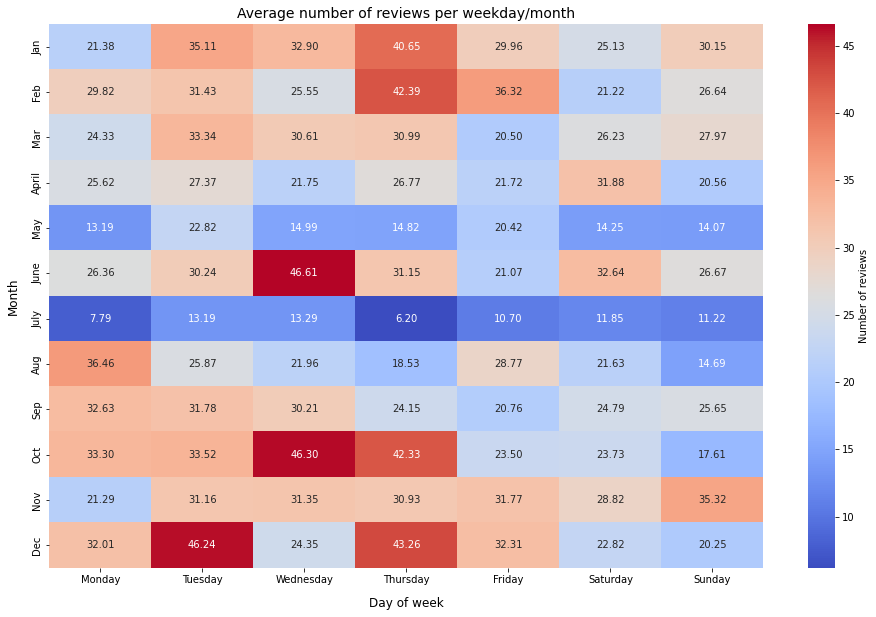

In [79]:
#Heatmap for average number of reviews per weekday/month

#setting figure size
plt.figure(figsize = (16,10))

#creating heatmap
ax = sns.heatmap(monthly_daily('Num_of_reviews').T, cmap = "coolwarm",
               xticklabels = "Monday Tuesday Wednesday Thursday Friday Saturday Sunday".split(),
               yticklabels = "Jan Feb Mar April May June July Aug Sep Oct Nov Dec".split(),
               annot = True, fmt = '.2f',
               cbar_kws = {'label': 'Number of reviews'})

#To display x label, y label and the title of the heatmap
ax.set_xlabel("Day of week", labelpad = 12).set_fontsize('12')
ax.set_ylabel("Month", labelpad = 12).set_fontsize('12')
ax.set_title("Average number of reviews per weekday/month").set_fontsize('14')
plt.show()

Inference:

1. According to the heatmap, the highest and lowest average number of reviews per weekday/month are on the weekdays of June and July (i.e. Wednesday with approximately 47 reviews and Thursday with approximately 6 reviews).
2. The minimum average number of reviews per weekday/month is in the month of July.

According to my hypothesis:

1. Customers are ordering less in May and July. 

##### The 'Time' column is only used for understanding the reviews vs date time behaviour and we will not use this column for further analysis, thereby dropping the 'Time' and all additional columns created from it (i.e., month, dayofweek, and hour) from the dataframe.

In [80]:
#Removing Time, month, dayofweek, and hour column from the dataframe
zomato_df.drop(['Time', 'month', 'dayofweek', 'hour'], axis=1, inplace = True)
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9954
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant            9955 non-null   object 
 1   Cost                  9955 non-null   float64
 2   Cuisines              9955 non-null   object 
 3   num_cuisines_offered  9955 non-null   int64  
 4   Reviewer              9955 non-null   object 
 5   Review                9955 non-null   object 
 6   Rating                9955 non-null   float64
 7   Metadata              9955 non-null   object 
 8   Pictures              9955 non-null   int64  
 9   Num_of_reviews        9955 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 1.1+ MB


## **Recommended zomato restaurants**

For some good recommendations we will search for:

*  A restaurant with a good rating i.e. Ratings > 4.

*  A restaurant which has been visited by a good amount of people i.e. Reviews > 100.

*  A restaurant that offers at least 2 Cuisines.

In [81]:
#Applying the above mentioned criterias to create a new dataframe with recommended restaurants
recommend_df = zomato_df.loc[(zomato_df['Rating'] > 4) & (zomato_df['Num_of_reviews'] > 100) & (zomato_df['num_cuisines_offered'] >= 2)].sort_values(by='Rating', ascending=False)

In [82]:
#shape of the dataset
recommend_df.shape

(121, 10)

In [83]:
#Printing the no. of restaurants
print ("Number of recommended zomato restaurants: ", recommend_df.shape[0])

Number of recommended zomato restaurants:  121


### **Recommended restaurants distribution based on cost, no. of reviews, and pictures posted**

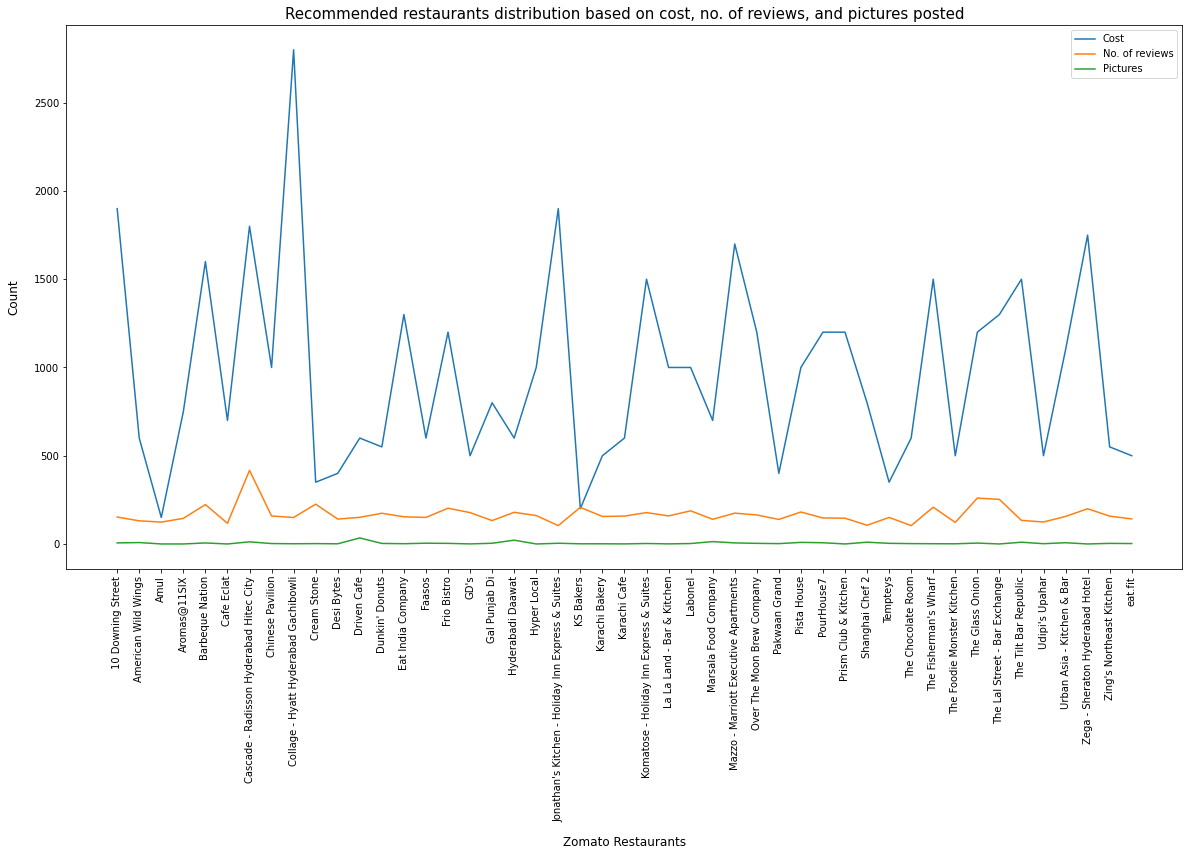

In [84]:
#Plotting a line chart to check the relationship between cost, number of reviews, and pictures posted with reviews.

#creating different series for average value of cigsPerDay, totChol, sysBP and heartrate based on age
line_1 = recommend_df.groupby("Restaurant").Cost.mean()
line_2 = recommend_df.groupby("Restaurant").Num_of_reviews.mean()
line_3 = recommend_df.groupby("Restaurant").Pictures.mean()

#setting figure size
plt.figure(figsize=(20,10))

#setting the xticks
plt.xticks(rotation = 90)

#creating line chart 
sns.lineplot(data = line_1, label = "Cost")
sns.lineplot(data = line_2, label = "No. of reviews")
sns.lineplot(data = line_3, label = "Pictures")

#To display the x label, y label and title of the line chart
plt.xlabel("Zomato Restaurants", labelpad=14, fontsize = 12)
plt.ylabel("Count", labelpad=14, fontsize = 12)
plt.title(f"Recommended restaurants distribution based on cost, no. of reviews, and pictures posted", fontsize = 15)
plt.show()

Inference:

On average:
1. Most and least expensive restaurant is Collage-Hyatt Hyderabad Gachibowli and Amul, respectively, among the recommended restaurants. 
2. Cascade-Radisson Hyderabad Hitec City and Jonathan's Kitchen-Holiday Inn Express & Suites has got maximum and minimum number of reviews among the recommended restaurants.
3. Driven Cafe has got the maximum pictures posted with review among the recommended restaurants.

According to my hypothesis:
1. Collage-Hyatt Hyderabad Gachibowli is having high price eatables due to its taste, hygiene, and services.
2. Amul seems to be affordable for everyone.
3. Cascade-Radisson Hyderabad Hitec City is the most popular among customers as it has got the maximum number of reviews.
4. Driven Cafe may have unique packaging and food that looks delicious as it has got the maximum pictures posted with review.

### **Top 5 recommended restaurants**

In [85]:
#Here are the top 5 restaurants satisfying the above criterias
recommend_df.head(8)

,Restaurant,Cost,Cuisines,num_cuisines_offered,Reviewer,Review,Rating,Metadata,Pictures,Num_of_reviews
464,Over The Moon Brew Company,1200.0,"Asian, Continental, North Indian, Chinese, Med...",5,Akash Ramteke,Extreme lively place with great music and grea...,5.0,"122 Reviews , 388 Followers",1,122.0
5534,Cafe Eclat,700.0,"Cafe, Bakery",2,Debangana Tarafdar,This place is located on the Gachibowli Highwa...,5.0,"117 Reviews , 980 Followers",0,117.0
7230,Labonel,1000.0,"Bakery, Desserts",2,Tanushree Karan,Very renowned place for bakery. The cakes are ...,5.0,"104 Reviews , 894 Followers",1,104.0
7219,Labonel,1000.0,"Bakery, Desserts",2,Harshita,"These cupcakes are so soft, fresh, chocolaty, ...",5.0,"125 Reviews , 363 Followers",0,125.0
7178,Eat India Company,1300.0,"North Indian, Mughlai, Beverages",3,Avin Seth,A family dine in place great ambiane tasty foo...,5.0,"197 Reviews , 1383 Followers",3,197.0
7136,Eat India Company,1300.0,"North Indian, Mughlai, Beverages",3,Chirag Gupta ?,If you are craving for some really good food a...,5.0,"111 Reviews , 1013 Followers",0,111.0
7035,Urban Asia - Kitchen & Bar,1100.0,"Asian, Thai, Chinese, Sushi, Momos",5,Rishav Sarkar,Visited this branch of Urban Asia this afterno...,5.0,"123 Reviews , 405 Followers",6,123.0
7033,Urban Asia - Kitchen & Bar,1100.0,"Asian, Thai, Chinese, Sushi, Momos",5,Kunal Khanra,"Amazing interior, heartwarming services, affor...",5.0,"189 Reviews , 2860 Followers",8,189.0


In [86]:
#Name of top 5 recommended restaurants
print(f"List of top 5 recommended restaurants are: {list(recommend_df['Restaurant'][:8].unique())}")

List of top 5 recommended restaurants are: ['Over The Moon Brew Company', 'Cafe Eclat', 'Labonel', 'Eat India Company', 'Urban Asia - Kitchen & Bar']


Inference:

1. Price range of top 5 recommended restaurants is moderate and expensive.
2. Rating of all the top 5 recommended restaurants is exceptional.
3. Pictures posting count of restaurants with moderate price range is low among the top 5 recommended restaurants.

According to my hypothesis:

1. Expensive restaurants are more famous among top 5 recommended restaurants as it has more number of reviews and pictures posted.

#**Most popular cuisines in zomato restaurants using WordCloud**

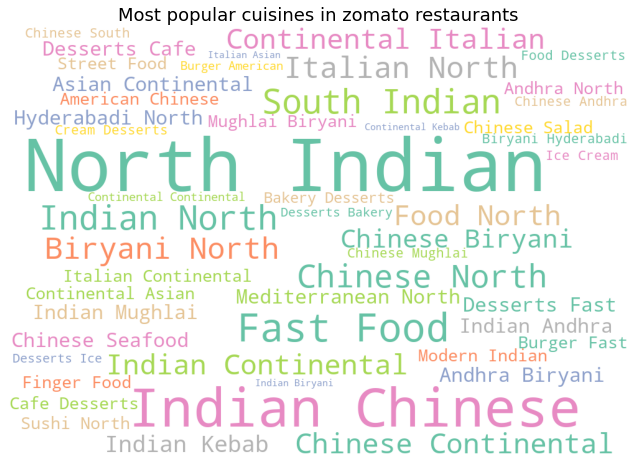

In [87]:
#setting figure size
plt.figure(figsize = (12, 8)) 

#join all cuisines  
text = ' '.join(zomato_df.Cuisines)

#To generate an image that gives us the most representative words 
wordcloud = WordCloud(width = 1000, height = 700, random_state = 1,
                      prefer_horizontal = 2, max_words = 50, colormap = 'Set2',              
                      background_color ='white').generate(text) 
  
#plot the WordCloud image                        
plt.imshow(wordcloud) 
plt.axis("off") 

#To display the title of the word cloud
plt.title('Most popular cuisines in zomato restaurants', fontsize = 18)
plt.show()

Inference:

1. Most popular cuisines in zomato restaurants are North Indian and Indian Chinese.

According to my hypothesis:

1. Zomato can suggest its restaurants to include North Indian and Indian Chinese in their cuisine to gain more orders.

#**Most famous zomato restaurants using WordCloud**

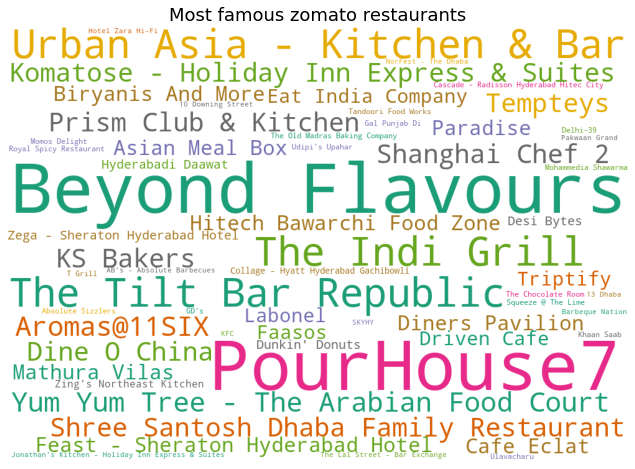

In [88]:
#setting figure size
fig = plt.figure(1,figsize=(12, 8))

#To generate an image that gives us the most representative words 
wordcloud = (WordCloud(width = 1000, height = 700, background_color = 'white', 
                       random_state = 1, prefer_horizontal = 2, 
                       colormap = 'Dark2', max_words = 60
                       ).generate_from_frequencies(
                           zomato_df.Restaurant.value_counts()))

#plot the WordCloud image                        
plt.imshow(wordcloud)
plt.axis('off')

#To display the title of the word cloud
plt.title('Most famous zomato restaurants', fontsize = 18)
plt.show()

Inference:

1. Beyond Flavours and PourHouse7 are most famous zomato restaurants.

According to my hypothesis:

1. Zomato should collaborate with more famous restaurants like Beyond Flavours and PourHouse7 to increase its popularity.

#**Customer reviews using WordCloud**

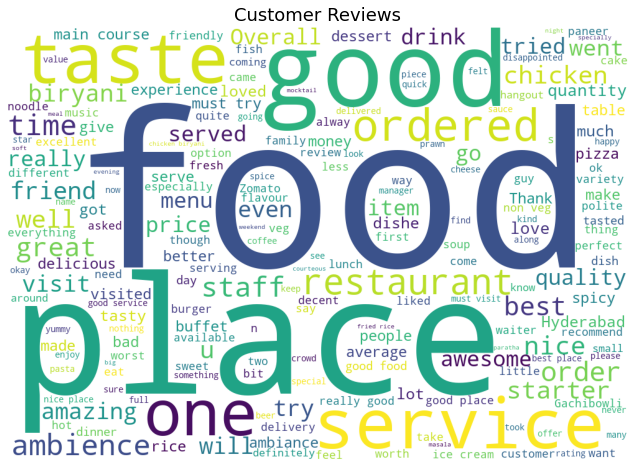

In [89]:
#setting figure size
plt.figure(figsize = (12, 8)) 

#join all reviews  
text = ' '.join(zomato_df.Review)

#To generate an image that gives us the most representative words 
wordcloud = WordCloud(width = 1000, height = 700,      
                      prefer_horizontal = 2, random_state = 2, 
                      background_color = 'white').generate(text) 
  
#plot the WordCloud image                        
plt.imshow(wordcloud) 
plt.axis("off") 

#To display the title of the word cloud
plt.title('Customer Reviews', fontsize = 18)
plt.show()

Inference:

1. Popular words in zomato restaurants reviews are food and place.

According to my hypothesis:

1. Customers are generally giving reviews on the basis of food, place, taste, service, and ambience.


# **Checking frequency distribution of all data using histogram**

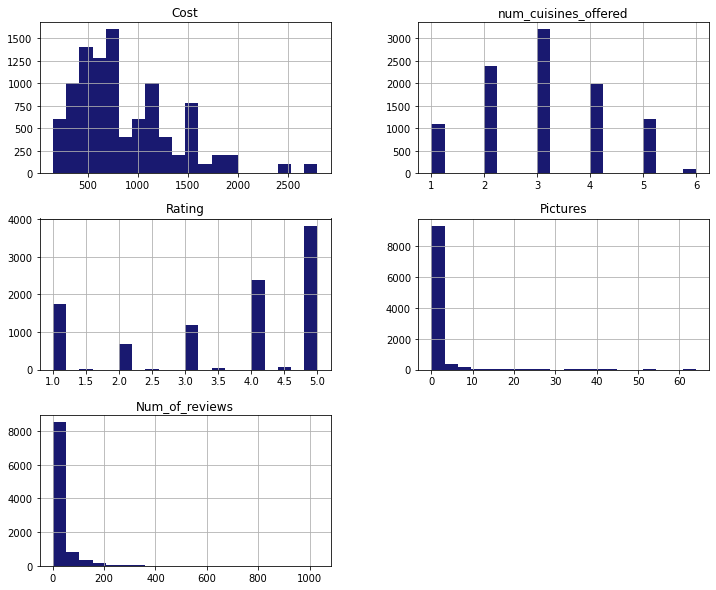

In [90]:
#Frequency distribution of variables to visualize their distribution
zomato_df.hist(bins = 20 , color = "midnightblue", figsize = (12,10))
plt.show()

Inference:

1. All variables shows irregular distribution except "Pictures" and "Num_of_reviews".

2. "Pictures" and "Num_of_reviews" are positively skewed.


# **Drawing heat map to compare the correlation between features**

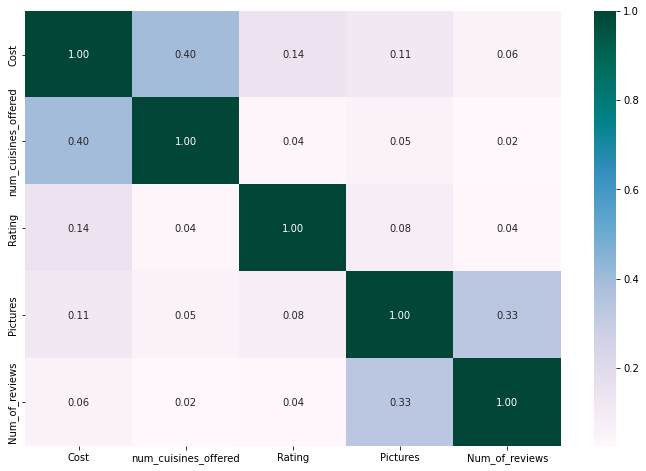

In [91]:
#Drawing heat map to compare the correlation between features

#setting figure size
plt.figure(figsize = (12,8))

#creating heatmap
corr = zomato_df.corr()
sns.heatmap(corr, cmap = 'PuBuGn', annot = True, fmt = '.2f')
plt.show()

Inference:

1. All variables are positively correlated with each other. 
2. None of the variable are highly correlated with each other.


In [92]:
#dropping the features that will not be used in clustering and sentiment analysis
zomato_df.drop(['Reviewer', 'Metadata', 'Pictures', 'Num_of_reviews'], axis=1, inplace = True)
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9954
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant            9955 non-null   object 
 1   Cost                  9955 non-null   float64
 2   Cuisines              9955 non-null   object 
 3   num_cuisines_offered  9955 non-null   int64  
 4   Review                9955 non-null   object 
 5   Rating                9955 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 802.5+ KB


#**Clustering**

In [93]:
#converting string of cuisines to list of cuisines
zomato_metadata['Cuisines'] = zomato_metadata['Cuisines'].str.replace(' ','').str.split(',')
zomato_metadata['Cuisines']

0      [Chinese, Continental, Kebab, European, SouthI...
1                        [Biryani, NorthIndian, Chinese]
2          [Asian, Mediterranean, NorthIndian, Desserts]
3      [Biryani, NorthIndian, Chinese, Seafood, Bever...
4      [Asian, Continental, NorthIndian, Chinese, Med...
                             ...                        
100                                    [FastFood, Salad]
101                                     [Bakery, Mithai]
102                      [NorthIndian, Biryani, Chinese]
103                                           [FastFood]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

In [94]:
#encoding multiple labels per instance
mlb = MultiLabelBinarizer(sparse_output=True)

#Creating a dataFrame from a scipy sparse matrix
zomato_metadata = zomato_metadata.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(zomato_metadata.pop('Cuisines')),
                                                               index = zomato_metadata.index, columns=mlb.classes_))
#To see all columns 
pd.set_option('display.max_columns', None)

#Displays the first five rows of the dataset
zomato_metadata.head()

,Restaurant,Cost,num_cuisines_offered,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,Cafe,Chinese,Continental,Desserts,European,FastFood,FingerFood,Goan,HealthyFood,Hyderabadi,IceCream,Indonesian,Italian,Japanese,Juices,Kebab,Lebanese,Malaysian,Mediterranean,Mexican,Mithai,ModernIndian,Momos,Mughlai,NorthEastern,NorthIndian,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps
0,Beyond Flavours,800.0,6,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,Paradise,800.0,3,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Flechazo,1300.0,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,800.0,5,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,Over The Moon Brew Company,1200.0,5,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [95]:
#creating dataset for training
X = zomato_metadata[list(zomato_metadata.columns)]

#Transforming the data
scaler = StandardScaler()
scaler.fit_transform(X.iloc[:, 1:])
X.shape

(105, 47)

## **K-Means Clustering**

### **Selecting the number of clusters**

In [96]:
#within cluster sum of squares
wcss = []

#using 'for' loop for storing wcss values in the empty list created above
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X.iloc[:, 1:])
    wcss.append(kmeans.inertia_)

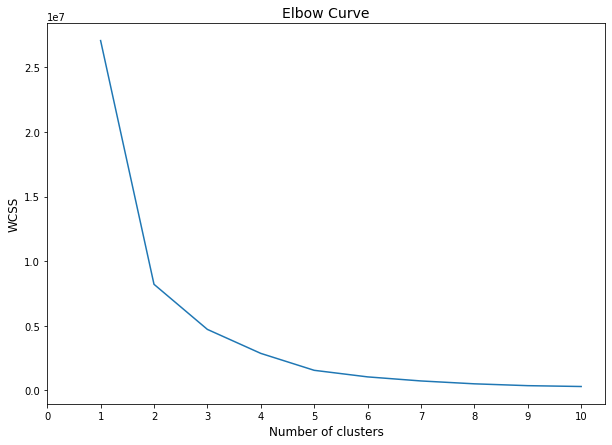

In [97]:
#setting figure size
plt.figure(figsize=(10,7))

#Plotting elbow curve for selecting the value of k
plt.plot(range(1, 11), wcss)

#To display the x label, y label, title and xticks 
plt.xlabel('Number of clusters', fontsize = 12)
plt.ylabel('WCSS', fontsize = 12)
plt.title('Elbow Curve', fontsize = 14) 
plt.xticks(ticks = list(range(0, 11)))
plt.show()

From the above elbow curve,

Number of clusters = 5

### **Model implementation of k-means**

In [98]:
#creating base model
kmeans = KMeans(n_clusters = 5, random_state = 0)

#fitting the model to the dataset
kmeans.fit(X.iloc[:, 1:])

KMeans(n_clusters=5, random_state=0)

In [99]:
#Predicting the closest cluster each sample in X belongs to
y_cluster = kmeans.predict(X.iloc[:, 1:])
y_cluster

array([0, 0, 1, 0, 1, 4, 3, 3, 1, 3, 3, 4, 0, 1, 4, 3, 3, 3, 4, 3, 3, 4,
       4, 3, 4, 1, 1, 1, 0, 3, 0, 1, 0, 0, 4, 0, 0, 3, 1, 0, 1, 3, 0, 3,
       1, 0, 4, 0, 3, 3, 0, 3, 3, 1, 3, 0, 2, 3, 3, 3, 1, 1, 3, 0, 0, 4,
       0, 1, 4, 4, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 3, 0, 0, 3, 0, 3, 0, 0,
       3, 3, 4, 4, 2, 3, 3, 3, 0, 4, 3, 1, 0, 3, 3, 3, 4], dtype=int32)

In [100]:
#unique clusters with its count
np.unique(y_cluster, return_counts = True)

(array([0, 1, 2, 3, 4], dtype=int32), array([31, 20,  2, 36, 16]))

In [101]:
#Creating an array
x = np.array(X)

## **Clusters of restaurants based on price**

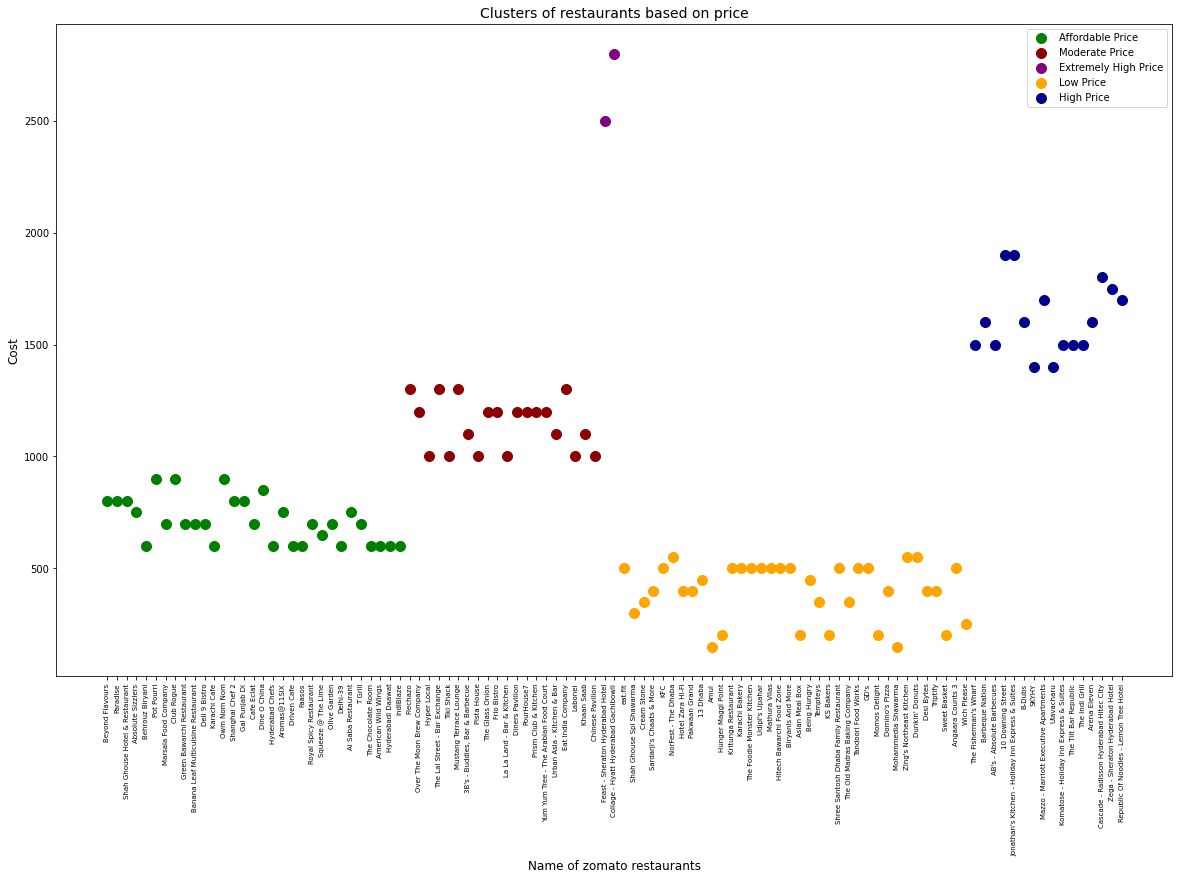

In [102]:
#setting figure size
plt.figure(figsize=(20, 12))  

#Visualizing the clusters
plt.scatter(x[y_cluster == 0, 0], x[y_cluster == 0, 1], s = 100, c = 'green', label = 'Affordable Price')
plt.scatter(x[y_cluster == 1, 0], x[y_cluster == 1, 1], s = 100, c = 'darkred', label = 'Moderate Price')
plt.scatter(x[y_cluster == 2, 0], x[y_cluster == 2, 1], s = 100, c = 'purple', label = 'Extremely High Price')
plt.scatter(x[y_cluster == 3, 0], x[y_cluster == 3, 1], s = 100, c = 'orange', label = 'Low Price')
plt.scatter(x[y_cluster == 4, 0], x[y_cluster == 4, 1], s = 100, c = 'darkblue', label = 'High Price')

#To display the x label, y label, title and xticks 
plt.title('Clusters of restaurants based on price', fontsize = 14)
plt.xlabel('Name of zomato restaurants', fontsize = 12)
plt.ylabel('Cost', fontsize = 12)
plt.xticks(fontsize=7, rotation = 90)
plt.legend()
plt.show()

Inference:

1. From the above cluster distribution, restaurants with a low price have the largest cluster, and restaurants with an extremely high price have the smallest cluster.

According to my hypothesis:

1. Zomato restaurants that have a low and affordable cost per person are in more demand.


## **Clusters of number of cuisines and cost**

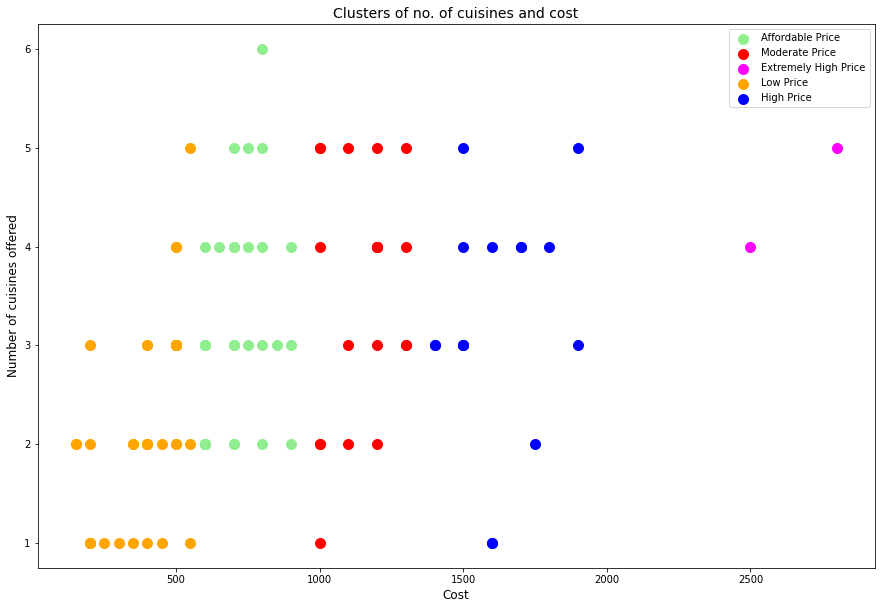

In [103]:
#setting figure size
plt.figure(figsize=(15, 10))  

#Visualizing the clusters
plt.scatter(x[y_cluster == 0, 1], x[y_cluster == 0, 2], s = 100, c = 'lightgreen', label = 'Affordable Price')
plt.scatter(x[y_cluster == 1, 1], x[y_cluster == 1, 2], s = 100, c = 'red', label = 'Moderate Price')
plt.scatter(x[y_cluster == 2, 1], x[y_cluster == 2, 2], s = 100, c = 'magenta', label = 'Extremely High Price')
plt.scatter(x[y_cluster == 3, 1], x[y_cluster == 3, 2], s = 100, c = 'orange', label = 'Low Price')
plt.scatter(x[y_cluster == 4, 1], x[y_cluster == 4, 2], s = 100, c = 'blue', label = 'High Price')

#To display x label, y label, and the title
plt.title('Clusters of no. of cuisines and cost', fontsize = 14)
plt.xlabel('Cost', fontsize = 12)
plt.ylabel('Number of cuisines offered', fontsize = 12)
plt.legend()
plt.show()

Inference:

1. From the above cluster distribution, only restaurants with 4 and 5 cuisines offered have all range of price.

According to my hypothesis:

1. Cuisines with a low and affordable cost are in more demand.

In [104]:
#unique clusters with its count
np.unique(y_cluster,return_counts=True)
print(f"Unique clusters are {list(np.unique(y_cluster,return_counts=True)[0])}.")
print(f"Count of unique clusters are {list(np.unique(y_cluster,return_counts=True)[1])}.")

Unique clusters are [0, 1, 2, 3, 4].
Count of unique clusters are [31, 20, 2, 36, 16].


Clusters with labels 2 and 3 are having the least and most values, respectively.

In [105]:
#labels of cluster
X['labels'] = y_cluster

In [106]:
#Cluster with label 2
X[X['labels'] == 2]

,Restaurant,Cost,num_cuisines_offered,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,Cafe,Chinese,Continental,Desserts,European,FastFood,FingerFood,Goan,HealthyFood,Hyderabadi,IceCream,Indonesian,Italian,Japanese,Juices,Kebab,Lebanese,Malaysian,Mediterranean,Mexican,Mithai,ModernIndian,Momos,Mughlai,NorthEastern,NorthIndian,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps,labels
56,Feast - Sheraton Hyderabad Hotel,2500.0,4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2
92,Collage - Hyatt Hyderabad Gachibowli,2800.0,5,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2


In [107]:
#Cluster with label 3
X[X['labels'] == 3].head()

,Restaurant,Cost,num_cuisines_offered,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,Cafe,Chinese,Continental,Desserts,European,FastFood,FingerFood,Goan,HealthyFood,Hyderabadi,IceCream,Indonesian,Italian,Japanese,Juices,Kebab,Lebanese,Malaysian,Mediterranean,Mexican,Mithai,ModernIndian,Momos,Mughlai,NorthEastern,NorthIndian,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps,labels
6,eat.fit,500.0,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3
7,Shah Ghouse Spl Shawarma,300.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
9,Cream Stone,350.0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
10,Sardarji's Chaats & More,400.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,3
15,KFC,500.0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [108]:
#creating the list of all clusters
clusters = [X.iloc[:, 1:][X['labels'] == i].reset_index() for i in range(5)]

#Top 3 cuisines in each cluster
for clust_num, df in enumerate(clusters):
    print(f'Top 3 cuisines in cluster {clust_num+1}:\n', 
          df.drop(['index', 'Cost', 'num_cuisines_offered', 'labels'],
                  axis = 1).sum().sort_values(ascending = False).head(3),'\n')

Top 3 cuisines in cluster 1:
 NorthIndian    18
Chinese        18
Biryani        11
dtype: int64 

Top 3 cuisines in cluster 2:
 NorthIndian    14
Chinese         9
Italian         7
dtype: int64 

Top 3 cuisines in cluster 3:
 Asian          2
Italian        2
Continental    2
dtype: int64 

Top 3 cuisines in cluster 4:
 NorthIndian    17
Chinese        10
FastFood        9
dtype: int64 

Top 3 cuisines in cluster 5:
 NorthIndian    11
Asian           6
Continental     6
dtype: int64 



# **Sentiment Analysis**

## **Text Pre-processing**

In [109]:
#Displays the first five row of Review and Rating column
zomato_df[['Review', 'Rating']].head()

,Review,Rating
0,"The ambience was good, food was quite good . h...",5.0
1,Ambience is too good for a pleasant evening. S...,5.0
2,A must try.. great food great ambience. Thnx f...,5.0
3,Soumen das and Arun was a great guy. Only beca...,5.0
4,Food is good.we ordered Kodi drumsticks and ba...,5.0


In [110]:
#Displays the last five row of Review and Rating column
zomato_df[['Review', 'Rating']].tail()

,Review,Rating
9950,Madhumathi Mahajan Well to start with nice cou...,3.0
9951,This place has never disappointed us.. The foo...,4.5
9952,"Bad rating is mainly because of ""Chicken Bone ...",1.5
9953,I personally love and prefer Chinese Food. Had...,4.0
9954,Checked in here to try some delicious chinese ...,3.5


In [111]:
#creating a function to remove the punctuation
def remove_punctuation(text):
    '''It removes the punctuation from the given string.
    '''
    
    return text.translate(str.maketrans('', '', string.punctuation))

In [112]:
#assigning a variable to the stopwords
stop_words = ["'s","ve", "i", "me", "my", "myself", "we", "our", "ours", 
              "ourselves", "you","it", "its", "it's", "itself", "don", "should",
              "your", "yours", "yourself", "yourselves", "he", "him", "his", 
              "himself", "she", "her", "hers", "herself", "they", "them", "now",
              "their", "theirs", "themselves", "what", "which", "who", "whom",
              "this", "that", "these", "those", "am", "is", "are", "was",
              "were", "be", "been", "being", "have", "has", "had", "having",
              "do", "does", "did", "doing", "a", "an", "the", "and", "but",
              "if", "or", "because", "as", "until", "while", "of", "at", "by",
              "for", "with", "about", "against", "between", "into", "through",
              "during", "before", "after", "above", "below", "to", "from", 
              "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", 
              "why", "how", "all", "any", "both", "each", "few", "more", "most",
              "other", "some", "such",  "only", "own", "same", "so", "than", 
              "too", "very", "s", "t", "can", "will", "just"]

#creating a function to remove the stopwords
def remove_stopwords(text):
    '''It removes stopwords from the given string.
    '''
    
    return " ".join([word for word in text.split() if word not in stop_words])

In [113]:
#creating a function to remove the urls if any
def remove_urls(text):
    '''It removes urls from the given string.
    '''
    
    url = re.compile(r'https?://\S+|www\.\S+') 
    
    return url.sub(r'', text)

In [114]:
#creating a function to remove the html tags if any
def remove_html(text):
    '''It remove html tags from the given string.
    '''
    
    html = re.compile(r'<.*?>')
    
    return html.sub(r'', text)

In [115]:
#creating a function to remove the emoji patterns
def remove_emojis(text):
    '''It remove emoji patterns from the given string.
    '''
    
    emojis = re.compile(
                        "["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags 
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        u"\U0001f926-\U0001f937"
                        u"\U00010000-\U0010ffff"
                        u"\u2640-\u2642" 
                        u"\u2600-\u2B55"
                        u"\u200d"
                        u"\u23cf"
                        u"\u23e9"
                        u"\u231a"
                        u"\ufe0f"  # dingbats
                        u"\u3030"
                        "]+", flags = re.UNICODE 
                      ) 
    
    return emojis.sub(r'', text)

In [116]:
#creating a function to clean the text data

def clean_all(data):
    '''Takes the text data and return it after assuring the data-type, 
    lower casing it, removing punctuation, stopwords, urls, html tags,
    and emoji patterns.
    '''
    
    #make sure about the correct data type
    data = data.astype(str) 

    #lower casing
    data = data.str.lower()
    
    #list of functions to be performed
    remove = [remove_punctuation, remove_stopwords, remove_urls, 
              remove_html, remove_emojis]

    #remove punctuation, stopwords, urls, html tags, and emoji patterns
    for rem in remove:
        data = data.apply(rem)

    return data

In [117]:
#creating a column of clean reviews
zomato_df['review'] = clean_all(zomato_df['Review'])

In [118]:
#creating a binary column of 'good_reviews'
zomato_df["good_reviews"] = zomato_df["Rating"].apply(lambda score: 1 if score >= 4 else 0)

In [119]:
#creating column for polarity and subjectivity of review
zomato_df['polarity'] = zomato_df['review'].apply(lambda x: TextBlob(x).sentiment.polarity).round(2)
zomato_df['subjectivity'] = zomato_df['review'].apply(lambda x: TextBlob(x).sentiment.subjectivity).round(2)

In [120]:
#Displays the first five rows of the dataset
zomato_df[['Review', 'review', 'Rating', 'good_reviews', 'polarity', 'subjectivity']].head()

,Review,review,Rating,good_reviews,polarity,subjectivity
0,"The ambience was good, food was quite good . h...",ambience good food quite good saturday lunch c...,5.0,1,0.66,0.72
1,Ambience is too good for a pleasant evening. S...,ambience good pleasant evening service prompt ...,5.0,1,0.71,0.69
2,A must try.. great food great ambience. Thnx f...,must try great food great ambience thnx servic...,5.0,1,0.55,0.68
3,Soumen das and Arun was a great guy. Only beca...,soumen das arun great guy behavior sincerety g...,5.0,1,0.75,0.68
4,Food is good.we ordered Kodi drumsticks and ba...,food goodwe ordered kodi drumsticks basket mut...,5.0,1,0.52,0.52


In [121]:
#Displays the last five rows of the dataset
zomato_df[['Review', 'review', 'Rating', 'good_reviews', 'polarity', 'subjectivity']].tail()

,Review,review,Rating,good_reviews,polarity,subjectivity
9950,Madhumathi Mahajan Well to start with nice cou...,madhumathi mahajan well start nice courteous s...,3.0,0,0.31,0.64
9951,This place has never disappointed us.. The foo...,place never disappointed us food courteous sta...,4.5,1,0.17,0.71
9952,"Bad rating is mainly because of ""Chicken Bone ...",bad rating mainly chicken bone found veg food ...,1.5,0,0.12,0.51
9953,I personally love and prefer Chinese Food. Had...,personally love prefer chinese food couple tim...,4.0,1,0.41,0.62
9954,Checked in here to try some delicious chinese ...,checked try delicious chinese food seen nonveg...,3.5,0,0.10,0.63


In [122]:
#creating an empty dataframe to store mean polarity and subjectivity values
good_review_df = pd.DataFrame()

#storing mean polarity and subjectivity values in good_review_df
for i in range(2):
    good_review_df.loc[i, 'polarity'] = zomato_df.loc[zomato_df['good_reviews'] == i].polarity.mean()
    good_review_df.loc[i, 'subjectivity'] = zomato_df.loc[zomato_df['good_reviews'] == i].subjectivity.mean()

#displaying good_review_df
good_review_df

,polarity,subjectivity
0,-0.065722,0.53389
1,0.419158,0.60668


In [123]:
#creating a column for feedback with good and bad reviews 
good_review_df['feedback'] = good_review_df.index
good_review_df['feedback'] = good_review_df.feedback.map({0 : 'Bad Reviews',
                                                          1 : 'Good Reviews'})

#displaying good_review_df
good_review_df

,polarity,subjectivity,feedback
0,-0.065722,0.53389,Bad Reviews
1,0.419158,0.60668,Good Reviews


## **Sentiment analysis with subjectivity and polarity**

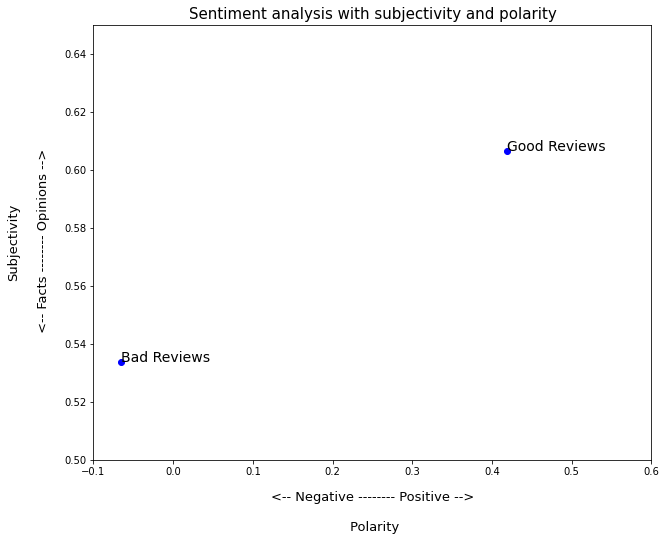

In [124]:
#setting figure size
plt.figure(figsize=(10, 8))  

#text with scatter plot to display sentiment analysis with subjectivity and polarity
for index in good_review_df.index:
    x = good_review_df['polarity'].loc[index]
    y = good_review_df['subjectivity'].loc[index]
    plt.scatter(x, y, color = 'blue')
    plt.text(x, y, s = good_review_df['feedback'][index], fontsize = 14)
    plt.xlim(-0.1, 0.6)
    plt.ylim(0.5, 0.65)

#To display the x label, y label and title of the line chart
plt.xlabel('<-- Negative -------- Positive -->\n \n Polarity', labelpad=14, fontsize=13)
plt.ylabel('Subjectivity\n \n <-- Facts -------- Opinions -->', labelpad=14, fontsize=13)
plt.title('Sentiment analysis with subjectivity and polarity', fontsize = 15)
plt.show()

Inference:
1. Good reviews have high polarity and subjectivity both.

According to my hypothesis:
1. Zomato customers are giving both positive and negative statements on their personal opinion.

## **Distribution of polarity score**

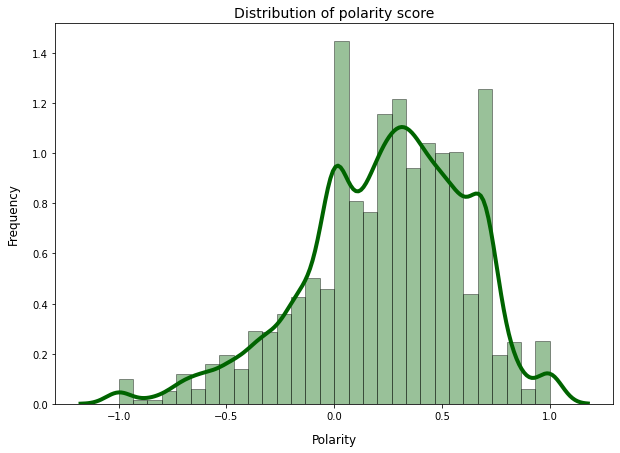

In [125]:
#setting figure size
plt.figure(figsize=(10, 7))  

#distribution plot to display the distribution of polarity score
sns.distplot(zomato_df['polarity'], hist=True, kde=True, 
             bins=int(30), color = 'darkgreen', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

#To display the x label, y label and title of the distribution plot
plt.xlabel('Polarity', labelpad = 12, fontsize = 12)
plt.ylabel('Frequency', labelpad = 12, fontsize = 12)
plt.title('Distribution of polarity score', fontsize=14)
plt.show()

Inference:
1. Polarity is non-uniformly distributed.

According to my hypothesis:
1. 
The density of positive feedback is more than negative feedback based on polarity distribution.


## **Distribution of polarity w.r.t. reviews**

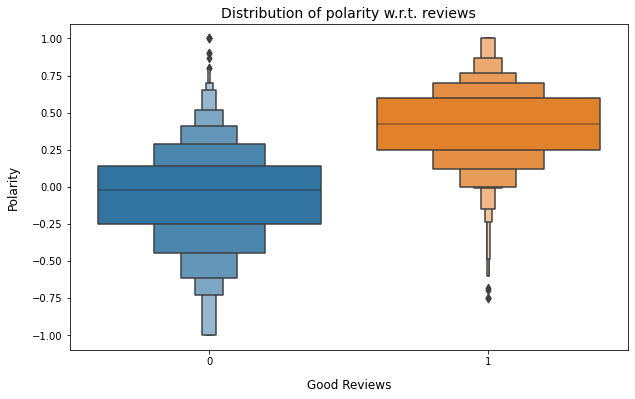

In [126]:
#setting figure size
plt.figure(figsize=(10, 6))  

#boxenplot to display the distribution of polarity score
sns.boxenplot(x = 'good_reviews', y = 'polarity', data = zomato_df)

#To display the x label, y label and title of the boxenplot
plt.xlabel('Good Reviews', labelpad = 12, fontsize = 12)
plt.ylabel('Polarity', labelpad = 12, fontsize = 12)
plt.title('Distribution of polarity w.r.t. reviews', fontsize=14)
plt.show()

Inference:
1. From the above boxenplot, we can observe that there are bad reviews with high polarity and good reviews with low polarity.

According to my hypothesis:
1. Customers giving positive feedback are not necessarily satisfied with the services offered by zomato restaurants.
2. Similarly, customers giving negative feedback are not necessarily unsatisfied with the services offered by zomato restaurants.


Let's check them

In [127]:
#review is good but rating is bad
zomato_df.loc[((zomato_df.polarity == 1) & (zomato_df.good_reviews == 0))].review.head(10).tolist()

['ordered paneer butter masala paneer quality best gravy not tasty',
 'food awesome delivered food 130 hours latewhen called asked replied lot ordersthis not farewe waited almost 90mins 20mins delivery',
 'excellent food always given plastic cutlery even though specifically request not provided']

## **Distribution of subjectivity score**

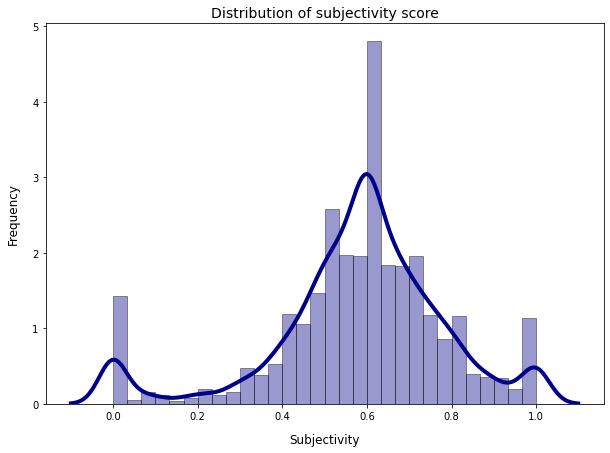

In [128]:
#setting figure size
plt.figure(figsize=(10, 7))  

#distribution plot to display the distribution of subjectivity score
sns.distplot(zomato_df['subjectivity'], hist=True, kde=True, 
             bins=int(30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

#To display the x label, y label and title of the distribution plot
plt.xlabel('Subjectivity', labelpad = 12, fontsize = 12)
plt.ylabel('Frequency', labelpad = 12, fontsize = 12)
plt.title('Distribution of subjectivity score', fontsize = 14)
plt.show()

Inference:
1. Subjectivity is non-uniformly distributed.

According to my hypothesis:
1. The density of personal opinions is more than factual information based on subjectivity distribution.

## **Distribution of subjectivity w.r.t. reviews**

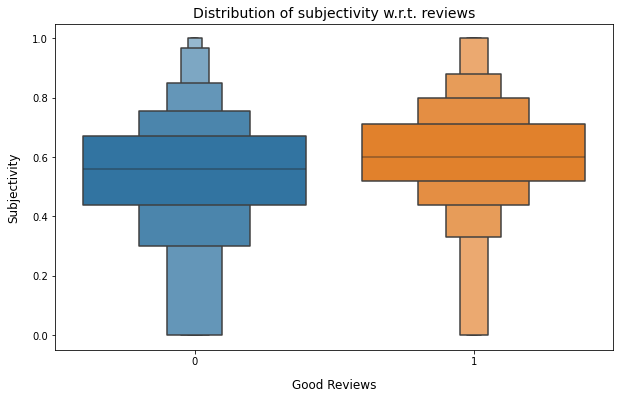

In [129]:
#setting figure size
plt.figure(figsize=(10, 6))  

#boxenplot to display the distribution of subjectivity score
sns.boxenplot(x = 'good_reviews', y = 'subjectivity', data = zomato_df)

#To display the x label, y label and title of the boxenplot
plt.xlabel('Good Reviews', labelpad = 12, fontsize = 12)
plt.ylabel('Subjectivity', labelpad = 12, fontsize = 12)
plt.title('Distribution of subjectivity w.r.t. reviews', fontsize=14)
plt.show()

Inference:

1. From the above boxenplot, we can observe that the median of good reviews is higher than the median of bad reviews for subjectivity.

According to my hypothesis:

1. Zomato restaurants should improve their services to avoid negative feedback from customers.

## **WordCloud for positive and negative words**

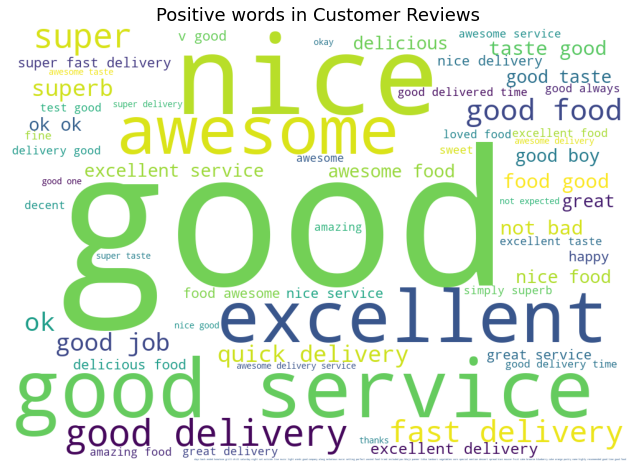

In [130]:
#setting figure size
fig = plt.figure(1,figsize=(12, 8))

#To generate an image that gives us the most representative words 
wordcloud = (WordCloud(width = 1000, height = 700, background_color = 'white', 
                       random_state = 1, prefer_horizontal = 2 
                       ).generate_from_frequencies(
                      zomato_df[zomato_df.polarity > 0].review.value_counts()))

#plot the WordCloud image                        
plt.imshow(wordcloud)
plt.axis('off')

#To display the title of the word cloud
plt.title('Positive words in Customer Reviews', fontsize = 18)
plt.show()

Inference:

1. Most commonly used positive words in customer reviews are "good" and "nice".

According to my hypothesis:

1. Zomato restaurants should improve the services offered to the customers to gain more positive feedback.

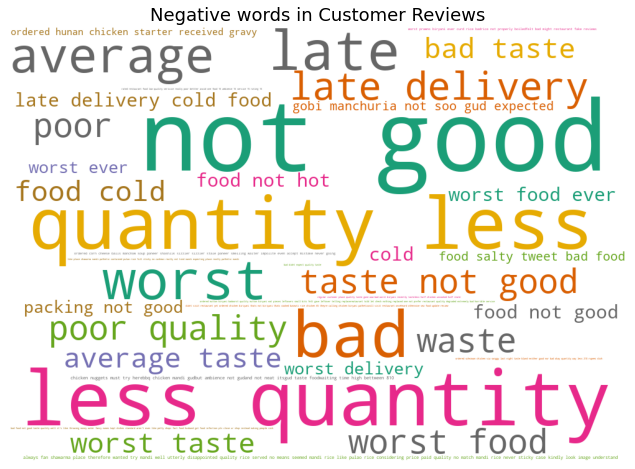

In [131]:
#setting figure size
fig = plt.figure(1,figsize=(12, 8))

#To generate an image that gives us the most representative words 
wordcloud = (WordCloud(width = 1000, height = 700, background_color = 'white', 
                       random_state = 1, prefer_horizontal = 2, colormap = 'Dark2'
                       ).generate_from_frequencies(
                      zomato_df[zomato_df.polarity < 0].review.value_counts()))

#plot the WordCloud image                        
plt.imshow(wordcloud)
plt.axis('off')

#To display the title of the word cloud
plt.title('Negative words in Customer Reviews', fontsize = 18)
plt.show()

Inference:

1. Most commonly used negative words in customer reviews are "not good" and "less quantity".

According to my hypothesis:

1. Zomato restaurants should focus on improving the quality and quantity of food.

## **Relationship of subjectivity and polarity with reviews**

<Figure size 720x432 with 0 Axes>

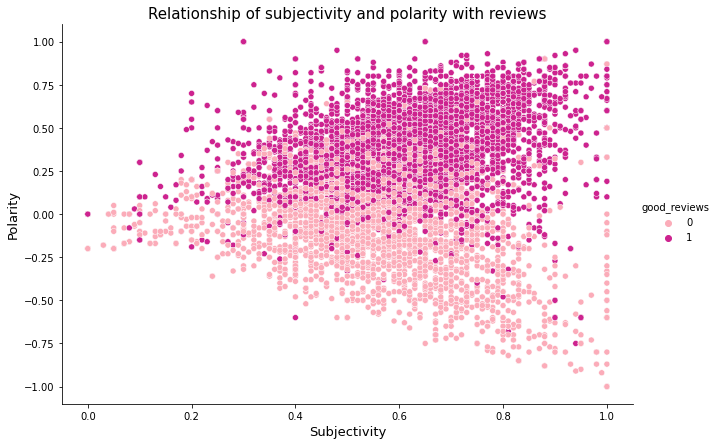

In [132]:
#setting figure size
plt.figure(figsize=(10,6))

#create relational plot
sns.relplot(x="subjectivity", y="polarity", hue = "good_reviews", alpha = 1 , 
            palette = "RdPu", height = 6, aspect = 1.5, data = zomato_df)

#To display the title, xlabel and ylabel of relational plot
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Polarity', fontsize=13)
plt.title('Relationship of subjectivity and polarity with reviews', fontsize=15)
plt.show()

Inference:
1. Good reviews are more than bad reviews in polarity and subjectivity both.

According to my hypothesis:
1. Zomato restaurants should continue to provide the same service, but with some improvements to avoid bad reviews and gain more good reviews.

## **Lemmatization**

In [133]:
#creating a function to get lexical categories of the part of speech tag
def get_pos(tag):
    '''Takes the part of speech tag in string format and return 
       its lexical categories.
    '''    
    
    if tag.startswith('J'):
        return wordnet.ADJ

    elif tag.startswith('V'):
        return wordnet.VERB

    elif tag.startswith('N'):
        return wordnet.NOUN

    elif tag.startswith('R'):
        return wordnet.ADV

    else:
        return wordnet.NOUN

In [134]:
#creating base lemmatizer object
lemmatizer = WordNetLemmatizer()

#creating a function to get lemmatized text
def lemmatized_words(text):
    '''Takes the text in string format and return lemmatized text.
    '''
    
    final_text = []
    for word in text.split():
        if word not in stop_words:
            pos = pos_tag([word])
            word = lemmatizer.lemmatize(word, get_pos(pos[0][1]))
            final_text.append(word)
            
    return " ".join(final_text)

In [135]:
#applying lemmatized_words function on review column
zomato_df.review = zomato_df.review.apply(lemmatized_words)

## **TF-IDF**

In [136]:
#X contains corpus (dependent variable)
X = zomato_df["review"]

#y contains answers if review is positive or negative
y = zomato_df["good_reviews"]

In [137]:
#Splitting the dataset into the training and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25 , random_state = 0)

In [138]:
#create the base model of TfidfVectorizer and LogisticRegression
tf_idf_vec = TfidfVectorizer()
LR_classifier = LogisticRegression()

In [139]:
#Instantiate the pipeline model
model = Pipeline([("vectorizer", tf_idf_vec), ("classifier", LR_classifier)])
model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [140]:
#get the predicted classes and probabilities
y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)

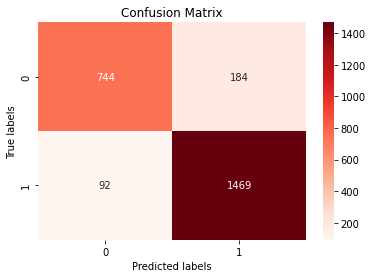

In [141]:
#create confusion matrix
cm = confusion_matrix(y_val, y_pred)

#create heatmap
ax= plt.subplot()
sns.heatmap(cm, annot = True, cmap = "Reds", fmt = 'g', ax = ax)

#To display the title, xlabel and ylabel of confusion matrix
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

Inference:

1. From the above heatmap, we can conclude that the classifier predicted 1653 reviews are positive, out of which 1469 reviews were actually positive (i.e. good reviews) and remaining 184 were negative (i.e. bad reviews).
2. The classifier predicted 836 reviews are negative, out of which 744 reviews were actually negative(i.e. bad reviews) and remaining 92 were positive(i.e. good reviews).

In [142]:
#Evaluated metrics of validation set
print("Accuracy of the model is:", accuracy_score(y_val, y_pred))
print("Precision of the model is:", precision_score(y_val, y_pred))
print("Recall of the model is:", recall_score(y_val, y_pred))
print("f1 score of the model is:", f1_score(y_val, y_pred))
print("ROC-AUC score of the model is:", roc_auc_score(y_val, y_prob[:, 1]))

Accuracy of the model is: 0.8891120932101245
Precision of the model is: 0.8886872353297036
Recall of the model is: 0.9410634208840487
f1 score of the model is: 0.9141257000622277
ROC-AUC score of the model is: 0.9502922805893658


In [143]:
#To print classification_report of the model
print(classification_report(y_val, model.predict(X_val)))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       928
           1       0.89      0.94      0.91      1561

    accuracy                           0.89      2489
   macro avg       0.89      0.87      0.88      2489
weighted avg       0.89      0.89      0.89      2489



Inference:
1. For this model the accuracy score is 0.89.
2. The precision for a customer giving a good review and a bad review is 0.89.
3. Recall for a customer giving a good review is 0.94 whereas for bad review is 0.80.
4. The f1-score for a customer giving a good review is 0.91 whereas for bad review is 0.84.
5. The data tested for good review is 1561 and for the bad review is 928.

# **Conclusion**

Clustering:

1. Using the k-means clustering algorithm following clusters were formed:

   * Clusters of restaurants based on price: From these clusters, we observed that customers prefer zomato restaurants that have a low and affordable estimated cost per person. 

   * Clusters of number of cuisines and cost: From these clusters, we observed that there is more demand for cuisines with low and affordable prices.

Sentiment Analysis:

1. Good reviews are more than bad reviews.

2. The pipelined model of TF-IDF with logistic regression provides an accuracy of 0.89 and a ROC-AUC score of 0.95 for the validation set. 

3. The model predicted that 836/2489 were bad reviews and 1653/2489 were good reviews.

4. The precision, recall, and f1-score for bad reviews in sentiment analysis of zomato restaurants are 0.89, 0.80, and 0.84, respectively, whereas for good reviews are 0.89, 0.94, and 0.91, respectively.